<a href="https://colab.research.google.com/github/pawan933-hash/PRODUCT_DEMAND_FORECASTING/blob/main/DEMAND_FORECASTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/trail_notebooks/Historical Product Demand.csv')

In [ ]:
df

Product_Code Warehouse Product_Category       Date Order_Demand
0        Product_0993    Whse_J     Category_028  2012/7/27         100 
1        Product_0979    Whse_J     Category_028  2012/1/19         500 
2        Product_0979    Whse_J     Category_028   2012/2/3         500 
3        Product_0979    Whse_J     Category_028   2012/2/9         500 
4        Product_0979    Whse_J     Category_028   2012/3/2         500 
...               ...       ...              ...        ...          ...
1048570  Product_1791    Whse_J     Category_006  2016/4/27        1000 
1048571  Product_1974    Whse_J     Category_006  2016/4/27           1 
1048572  Product_1787    Whse_J     Category_006  2016/4/28        2500 
1048573  Product_0901    Whse_J     Category_023  2016/10/7          50 
1048574  Product_0704    Whse_J     Category_001  2016/6/27           4 

[1048575 rows x 5 columns]

In [ ]:
#created a subset of the df. copy() is used so that any change in the subset does not effect the imported df
df=df[['Product_Code',
    #'Warehouse', 'Product_Category',
    'Date',
    'Order_Demand']].copy()

In [ ]:
df

Product_Code       Date Order_Demand
0        Product_0993  2012/7/27         100 
1        Product_0979  2012/1/19         500 
2        Product_0979   2012/2/3         500 
3        Product_0979   2012/2/9         500 
4        Product_0979   2012/3/2         500 
...               ...        ...          ...
1048570  Product_1791  2016/4/27        1000 
1048571  Product_1974  2016/4/27           1 
1048572  Product_1787  2016/4/28        2500 
1048573  Product_0901  2016/10/7          50 
1048574  Product_0704  2016/6/27           4 

[1048575 rows x 3 columns]

In [ ]:
#converting  object dtypes to required dtypes
df['Date']=pd.to_datetime(df['Date'], errors="coerce")
df['Order_Demand']=pd.to_numeric(df['Order_Demand'], errors='coerce')

In [ ]:
df.dropna(axis=0,how="any",inplace=True)

In [ ]:
df=df.rename(columns={'Product_Code':"Product",
                      "Order_Demand":'Order'})

In [ ]:
df

Product       Date   Order
0        Product_0993 2012-07-27   100.0
1        Product_0979 2012-01-19   500.0
2        Product_0979 2012-02-03   500.0
3        Product_0979 2012-02-09   500.0
4        Product_0979 2012-03-02   500.0
...               ...        ...     ...
1048570  Product_1791 2016-04-27  1000.0
1048571  Product_1974 2016-04-27     1.0
1048572  Product_1787 2016-04-28  2500.0
1048573  Product_0901 2016-10-07    50.0
1048574  Product_0704 2016-06-27     4.0

[1031437 rows x 3 columns]

In [ ]:
#swapping the boolean table
#passing boolean table inside a df.loc[] is prfered over passing boolen table to df[]
df=df.loc[~df.duplicated(subset=['Product', 'Date', 'Order'])]\
      .reset_index(drop=True).copy()

In [ ]:
df

Product       Date   Order
0       Product_0993 2012-07-27   100.0
1       Product_0979 2012-01-19   500.0
2       Product_0979 2012-02-03   500.0
3       Product_0979 2012-02-09   500.0
4       Product_0979 2012-03-02   500.0
...              ...        ...     ...
909818  Product_1759 2016-11-10     2.0
909819  Product_1974 2016-04-27     1.0
909820  Product_1787 2016-04-28  2500.0
909821  Product_0901 2016-10-07    50.0
909822  Product_0704 2016-06-27     4.0

[909823 rows x 3 columns]

In [ ]:
df['Month']=df["Date"].dt.month_name()

In [ ]:
df['Year']=df["Date"].dt.year

In [ ]:
df

Product       Date   Order     Month  Year
0       Product_0993 2012-07-27   100.0      July  2012
1       Product_0979 2012-01-19   500.0   January  2012
2       Product_0979 2012-02-03   500.0  February  2012
3       Product_0979 2012-02-09   500.0  February  2012
4       Product_0979 2012-03-02   500.0     March  2012
...              ...        ...     ...       ...   ...
909818  Product_1759 2016-11-10     2.0  November  2016
909819  Product_1974 2016-04-27     1.0     April  2016
909820  Product_1787 2016-04-28  2500.0     April  2016
909821  Product_0901 2016-10-07    50.0   October  2016
909822  Product_0704 2016-06-27     4.0      June  2016

[909823 rows x 5 columns]

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

In [ ]:
df

Product       Date   Order     Month  Year
0       Product_0993 2012-07-27   100.0      July  2012
1       Product_0979 2012-01-19   500.0   January  2012
2       Product_0979 2012-02-03   500.0  February  2012
3       Product_0979 2012-02-09   500.0  February  2012
4       Product_0979 2012-03-02   500.0     March  2012
...              ...        ...     ...       ...   ...
909818  Product_1759 2016-11-10     2.0  November  2016
909819  Product_1974 2016-04-27     1.0     April  2016
909820  Product_1787 2016-04-28  2500.0     April  2016
909821  Product_0901 2016-10-07    50.0   October  2016
909822  Product_0704 2016-06-27     4.0      June  2016

[909823 rows x 5 columns]

In [ ]:
df['Product'].value_counts()

Product
Product_1359    10835
Product_1295     7234
Product_1378     6758
Product_1286     6244
Product_1382     6026
                ...  
Product_1912        2
Product_1703        1
Product_0465        1
Product_2099        1
Product_0853        1
Name: count, Length: 2160, dtype: int64

In [ ]:
# Get the top 10 products based on their counts
top_10_products = df['Product'].value_counts().nlargest(10).index.tolist()

# Filter the DataFrame to include only the top 10 products
df = df[df['Product'].isin(top_10_products)].copy()

df.head(30)

Product       Date    Order      Month  Year
61   Product_1274 2012-01-16   1000.0    January  2012
62   Product_1274 2012-01-24   1000.0    January  2012
66   Product_1274 2012-01-31   1000.0    January  2012
67   Product_1274 2012-02-07   1000.0   February  2012
68   Product_1274 2012-02-13   1000.0   February  2012
69   Product_1274 2012-02-15   1000.0   February  2012
70   Product_1274 2012-02-21   2000.0   February  2012
72   Product_1274 2012-03-06   1000.0      March  2012
73   Product_1274 2012-03-12   1000.0      March  2012
75   Product_1274 2012-03-27   1000.0      March  2012
80   Product_1274 2012-04-02   1000.0      April  2012
81   Product_1274 2012-04-09   1000.0      April  2012
85   Product_1274 2012-05-01   1000.0        May  2012
86   Product_1274 2012-05-22   1000.0        May  2012
88   Product_1274 2012-06-04   1000.0       June  2012
92   Product_1274 2012-06-19   1000.0       June  2012
94   Product_1274 2012-06-27   1000.0       June  2012
95   Product_1274 2012-07-04   1000.0       July  2012
99   Product_1274 2012-07-24   1000.0       July  2012
101  Product_1274 2012-08-07   1000.0     August  2012
102  Product_1274 2012-08-21   1000.0     August  2012
103  Product_1274 2012-08-28   1000.0     August  2012
104  Product_1274 2012-09-03   1000.0  September  2012
109  Product_1274 2012-09-25   1000.0  September  2012
111  Product_1274 2012-10-12   1000.0    October  2012
112  Product_1274 2012-10-16   1000.0    October  2012
113  Product_1274 2012-11-06   1000.0   November  2012
119  Product_1274 2012-12-18   1000.0   December  2012
262  Product_1274 2012-02-16   1000.0   February  2012
268  Product_1359 2012-04-18  80000.0      April  2012

In [ ]:
top_10_products

['Product_1359',
 'Product_1295',
 'Product_1378',
 'Product_1286',
 'Product_1382',
 'Product_1294',
 'Product_1453',
 'Product_1377',
 'Product_1287',
 'Product_1274']

In [ ]:
# Create a dictionary to store DataFrames for each of top 10 product.
product_dataframes = {}

# Iterate through the top 10 products and create a DataFrame for each
for product in top_10_products:
    product_df = df[df['Product'] == product].copy()
    product_dataframes[product] = product_df

# Display the first few rows of the DataFrame for one of the products as an example
if top_10_products:
    example_product = top_10_products[0]
    print(f"Displaying data for {example_product}:")
    display(product_dataframes[example_product].head(10))
else:
    print("No top 10 products found.")

Displaying data for Product_1359:


Product       Date     Order     Month  Year
268  Product_1359 2012-04-18   80000.0     April  2012
274  Product_1359 2012-05-21   70000.0       May  2012
281  Product_1359 2012-06-26   80000.0      June  2012
284  Product_1359 2012-07-17  100000.0      July  2012
288  Product_1359 2012-08-24  100000.0    August  2012
292  Product_1359 2012-10-04   80000.0   October  2012
297  Product_1359 2012-10-29   80000.0   October  2012
906  Product_1359 2012-01-12   84000.0   January  2012
907  Product_1359 2012-01-20    1000.0   January  2012
908  Product_1359 2012-02-03    1000.0  February  2012

In [ ]:
product_dataframes

{'Product_1359':              Product       Date     Order     Month  Year
 268     Product_1359 2012-04-18   80000.0     April  2012
 274     Product_1359 2012-05-21   70000.0       May  2012
 281     Product_1359 2012-06-26   80000.0      June  2012
 284     Product_1359 2012-07-17  100000.0      July  2012
 288     Product_1359 2012-08-24  100000.0    August  2012
 ...              ...        ...       ...       ...   ...
 908075  Product_1359 2016-02-04   20000.0  February  2016
 908076  Product_1359 2016-02-19   13000.0  February  2016
 908077  Product_1359 2016-03-18   10000.0     March  2016
 908078  Product_1359 2016-04-01   20000.0     April  2016
 908079  Product_1359 2016-05-09   20000.0       May  2016
 
 [10835 rows x 5 columns],
 'Product_1295':              Product       Date    Order      Month  Year
 5652    Product_1295 2012-01-23  50000.0    January  2012
 5653    Product_1295 2012-02-08  50000.0   February  2012
 5654    Product_1295 2012-03-08  50000.0      March  

In [ ]:
#@title ##**`Dictionary: Stores grouped DataFrames of top 10 product.`**
# Create a dictionary to store grouped DataFrames for each product
grouped_product_dataframes = {}

# Iterate through the product_dataframes and group each by Year and Month
for product, product_df in product_dataframes.items():
    # Group by Year and Month and sum the 'Order' demand
    grouped_df = product_df.groupby(['Year', 'Month'], observed=False)['Order'].sum().reset_index()
    # Ensure the 'Month' column is categorical with the correct order
    grouped_df['Month'] = pd.Categorical(grouped_df['Month'], categories=month_order, ordered=True)
    # Sort by Year and Month to ensure chronological order
    grouped_df = grouped_df.sort_values(by=['Year', 'Month']).reset_index(drop=True)
    grouped_product_dataframes[product] = grouped_df

# Display the first few rows of the grouped DataFrame for one of the products as an example
if grouped_product_dataframes:
    example_product = list(grouped_product_dataframes.keys())[0]
    print(f"Displaying grouped data for {example_product}:")
    display(grouped_product_dataframes[example_product].head(10))
else:
    print("No grouped product dataframes found.")

Displaying grouped data for Product_1359:


Year      Month      Order
0  2012    January  7500000.0
1  2012   February  6558000.0
2  2012      March  6437000.0
3  2012      April  6981000.0
4  2012        May  7520000.0
5  2012       June  5100000.0
6  2012       July  5780000.0
7  2012     August  5459000.0
8  2012  September  6919000.0
9  2012    October  6380000.0

/tmp/ipython-input-4080123114.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(years_1359))


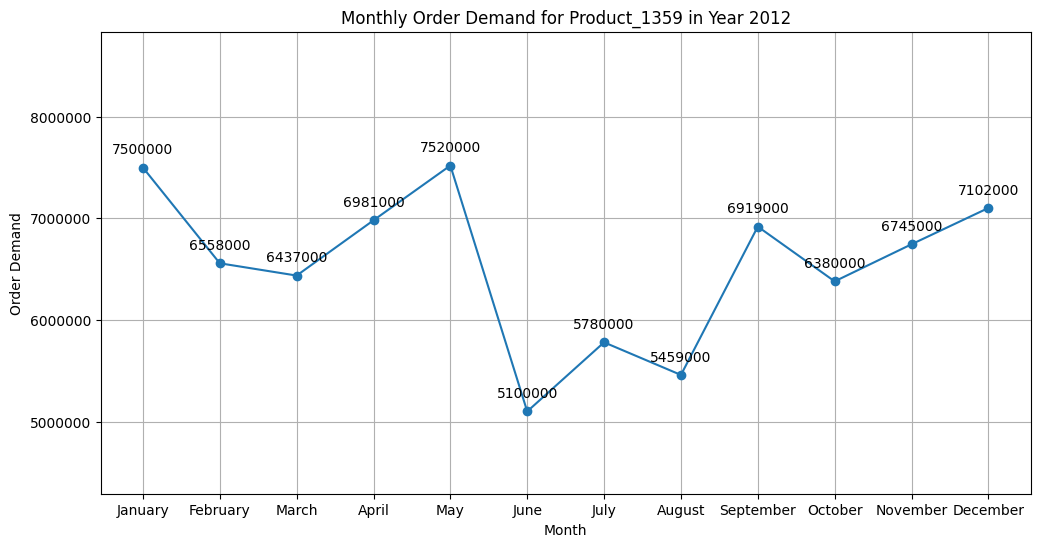

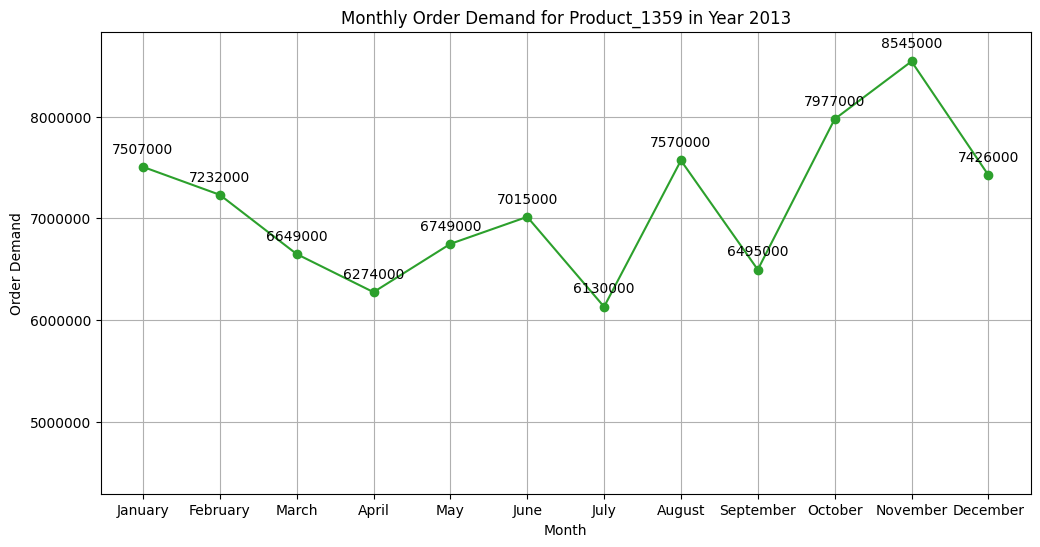

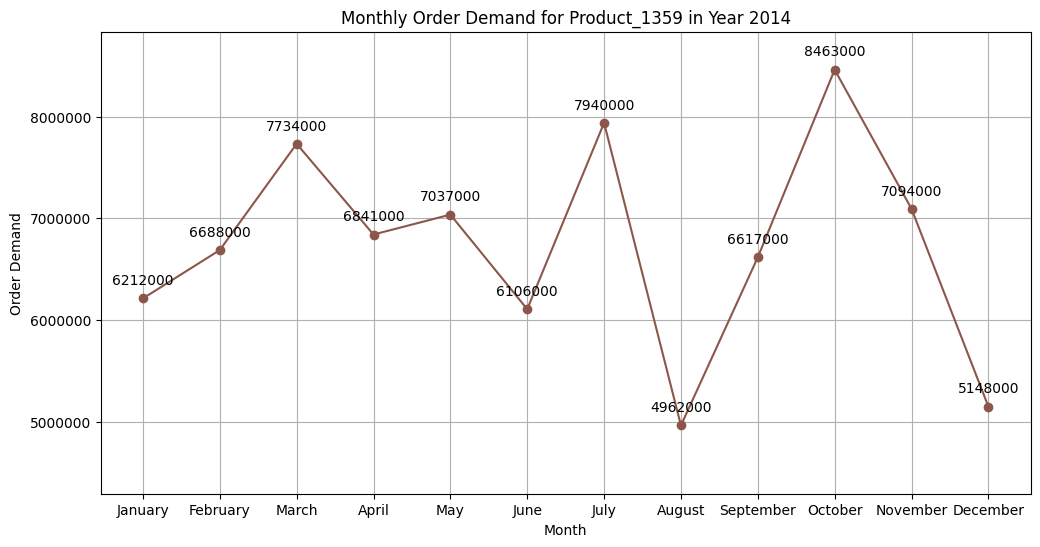

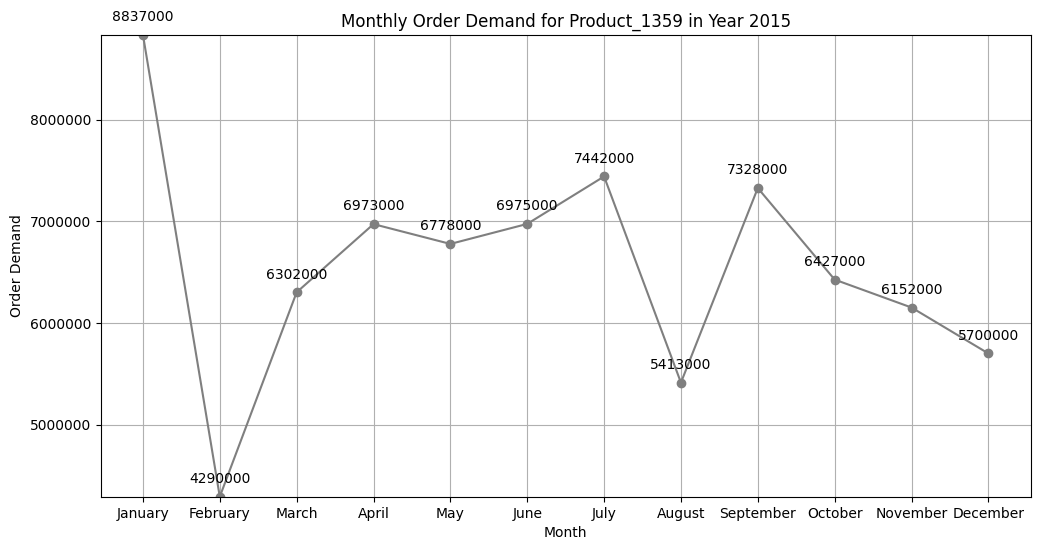

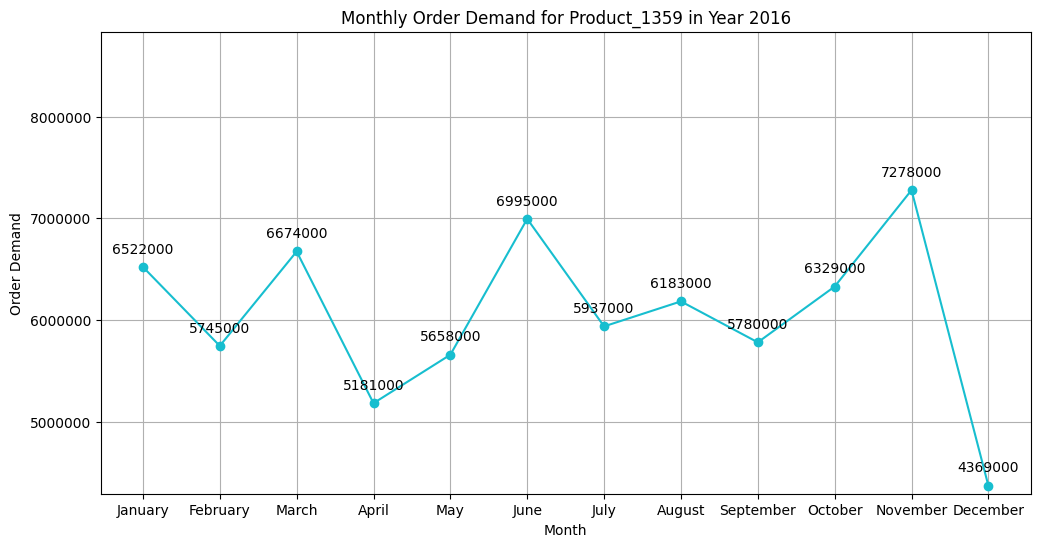

In [ ]:
#@title ##**`Product_1359: Monthly demand distribution per year.`**
import matplotlib.pyplot as plt

# Get the grouped DataFrame for Product_1359
product_1359_grouped_df = grouped_product_dataframes.get('Product_1359')

if product_1359_grouped_df is not None:
    # Identify years with zero or NaN order demand in any month
    years_with_min_demand = product_1359_grouped_df.groupby('Year')['Order'].min()
    years_to_exclude = years_with_min_demand[(years_with_min_demand == 0) | (years_with_min_demand.isna())].index.tolist()


    # Filter out years with zero or NaN order demand
    product_1359_filtered_df = product_1359_grouped_df[~product_1359_grouped_df['Year'].isin(years_to_exclude)].copy()

    # Get unique years for Product_1359 after filtering
    years_1359 = product_1359_filtered_df['Year'].unique()

    # Find the global minimum and maximum order values for consistent y-axis
    global_min_order = product_1359_filtered_df['Order'].min()
    global_max_order = product_1359_filtered_df['Order'].max()

    # Create a separate plot for each year for Product_1359
    colors = plt.cm.get_cmap('tab10', len(years_1359))
    for i, year in enumerate(years_1359):
        df_year_1359 = product_1359_filtered_df[product_1359_filtered_df['Year'] == year]

        plt.figure(figsize=(12, 6))
        plt.plot(df_year_1359['Month'].astype('category'), df_year_1359['Order'], marker='o', color=colors(i))

        # Add text labels for order values
        for j, txt in enumerate(df_year_1359['Order']):
            plt.annotate(f'{txt:.0f}', (df_year_1359['Month'].iloc[j], df_year_1359['Order'].iloc[j]), textcoords="offset points", xytext=(0,10), ha='center')

        plt.xlabel('Month')
        plt.ylabel('Order Demand')
        plt.title(f'Monthly Order Demand for Product_1359 in Year {year}')
        plt.grid(True)
        plt.ticklabel_format(style='plain', axis='y') # Change y-axis format
        plt.ylim(global_min_order, global_max_order) # Set consistent y-axis limits
        plt.show()
else:
    print("Data for Product_1359 not found in grouped_product_dataframes.")

/tmp/ipython-input-3608943158.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(years_1295))


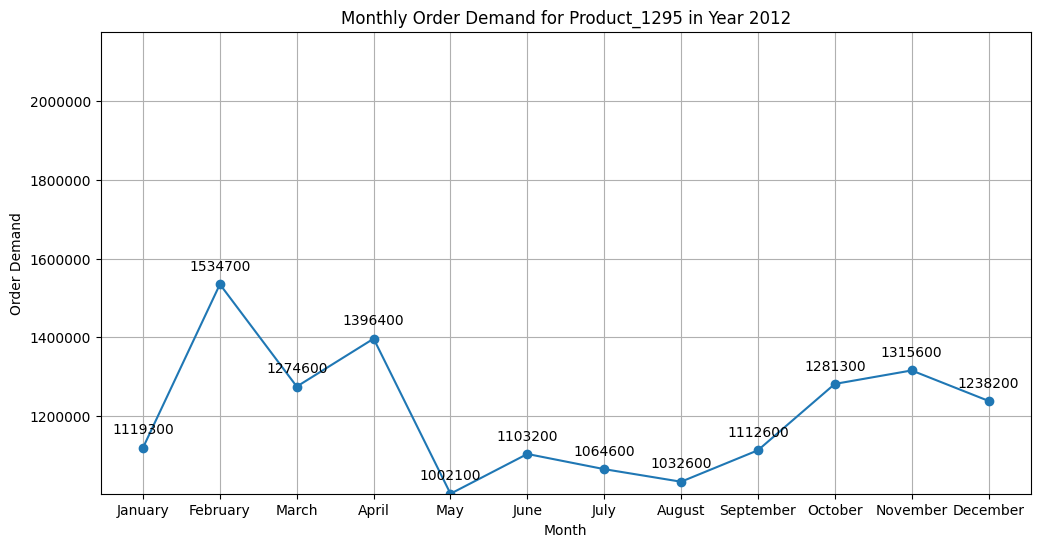

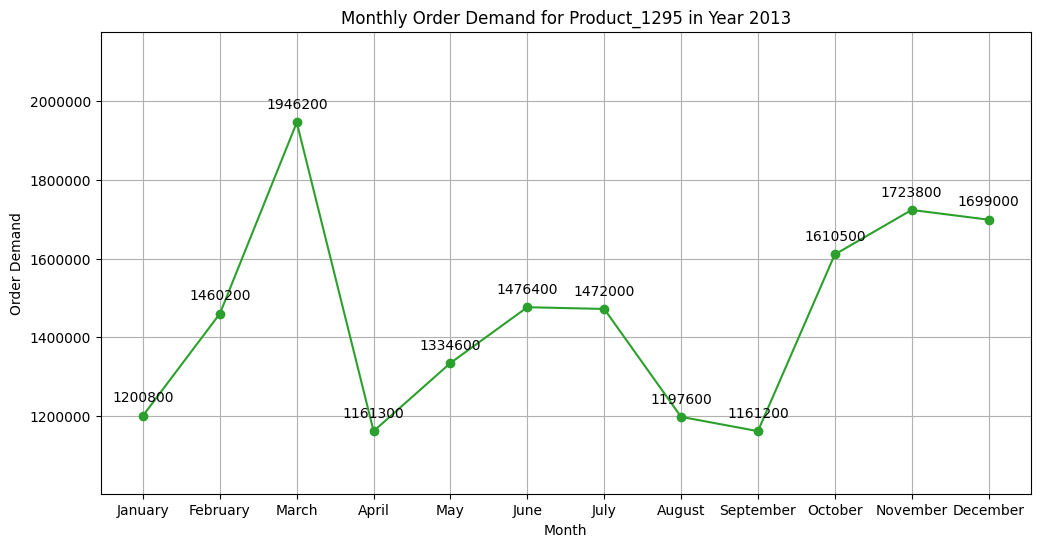

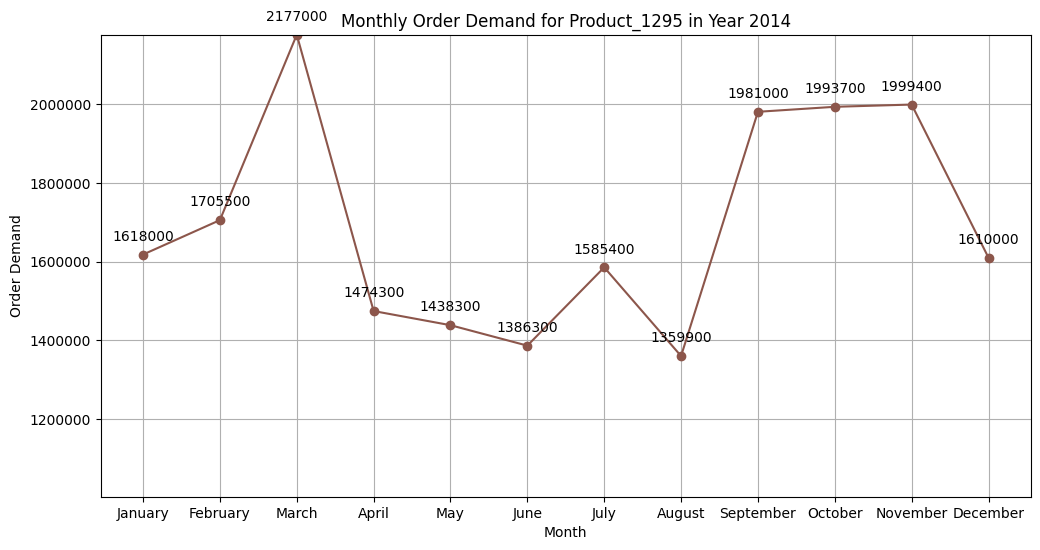

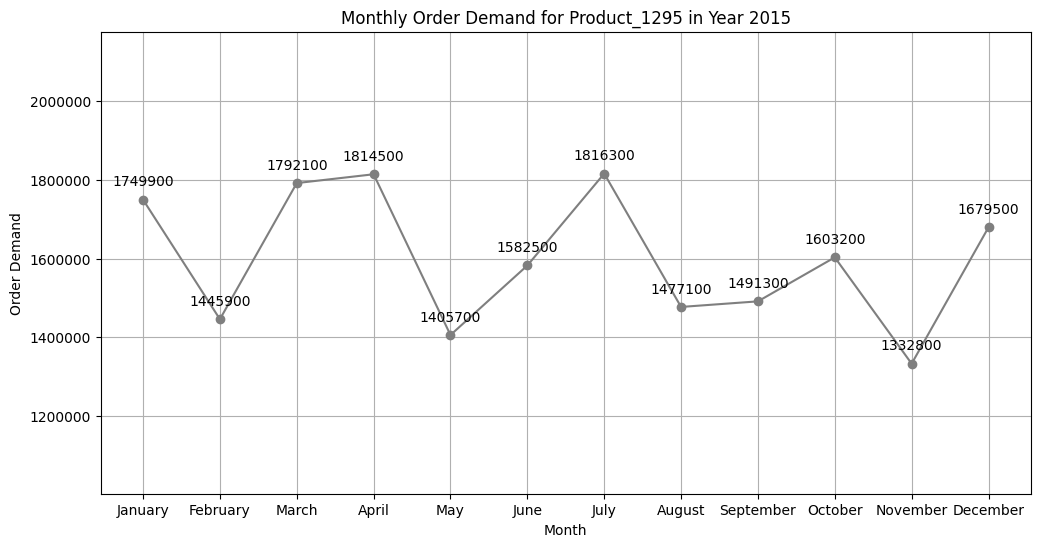

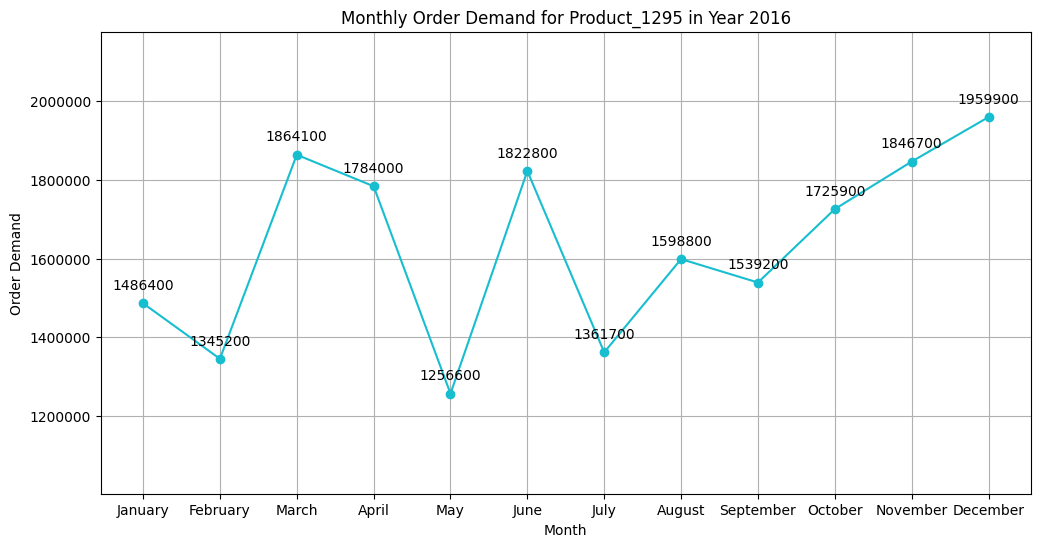

In [ ]:
#@title ##**`Product_1295: Monthly demand distribution per year.`**
import matplotlib.pyplot as plt

# Get the grouped DataFrame for Product_1295
product_1295_grouped_df = grouped_product_dataframes.get('Product_1295')

if product_1295_grouped_df is not None:
    # Identify years with zero order demand in any month
    years_with_zero_demand = product_1295_grouped_df.groupby('Year')['Order'].min()
    years_to_exclude = years_with_zero_demand[years_with_zero_demand == 0].index.tolist()

    # Filter out years with zero order demand
    product_1295_filtered_df = product_1295_grouped_df[~product_1295_grouped_df['Year'].isin(years_to_exclude)].copy()

    # Get unique years for Product_1295 after filtering
    years_1295 = product_1295_filtered_df['Year'].unique()

    # Find the global minimum and maximum order values for consistent y-axis
    global_min_order = product_1295_filtered_df['Order'].min()
    global_max_order = product_1295_filtered_df['Order'].max()

    # Create a separate plot for each year for Product_1295
    colors = plt.cm.get_cmap('tab10', len(years_1295))
    for i, year in enumerate(years_1295):
        df_year_1295 = product_1295_filtered_df[product_1295_filtered_df['Year'] == year]

        plt.figure(figsize=(12, 6))
        plt.plot(df_year_1295['Month'], df_year_1295['Order'], marker='o', color=colors(i))

        # Add text labels for order values
        for j, txt in enumerate(df_year_1295['Order']):
            plt.annotate(f'{txt:.0f}', (df_year_1295['Month'].iloc[j], df_year_1295['Order'].iloc[j]), textcoords="offset points", xytext=(0,10), ha='center')

        plt.xlabel('Month')
        plt.ylabel('Order Demand')
        plt.title(f'Monthly Order Demand for Product_1295 in Year {year}')
        plt.grid(True)
        plt.ticklabel_format(style='plain', axis='y') # Change y-axis format
        plt.ylim(global_min_order, global_max_order) # Set consistent y-axis limits
        plt.show()
else:
    print("Data for Product_1295 not found in grouped_product_dataframes.")

/tmp/ipython-input-3437837817.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(years_1378))


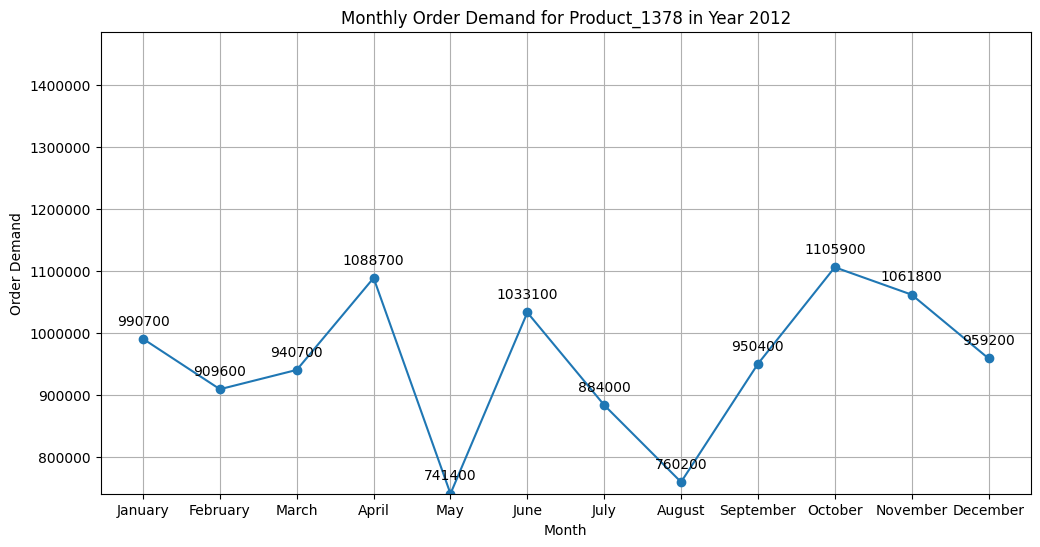

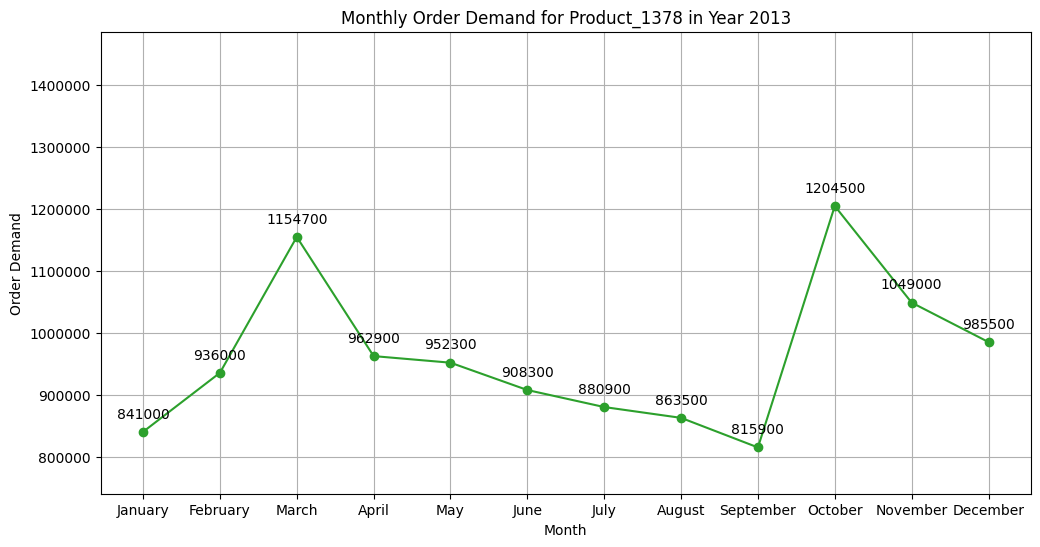

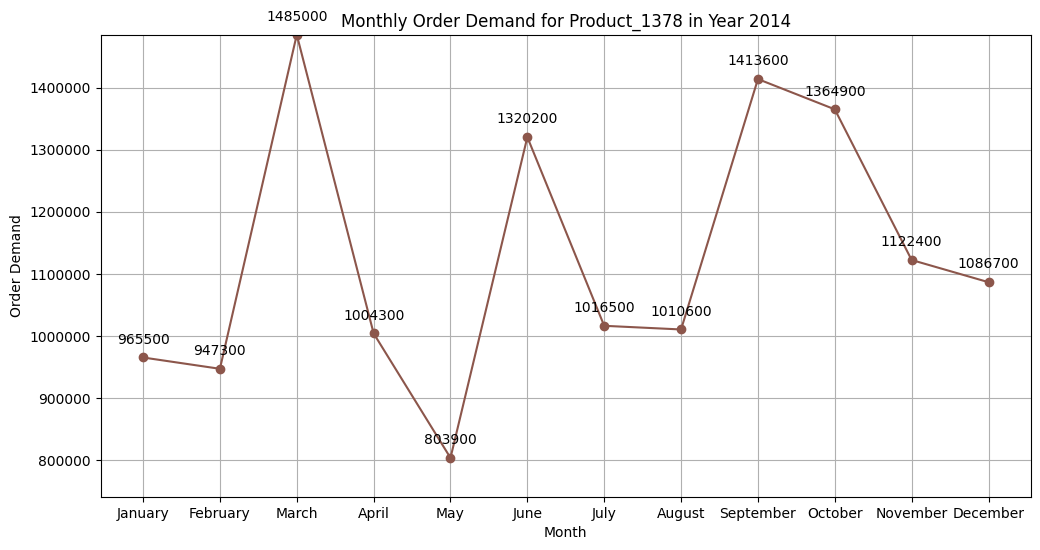

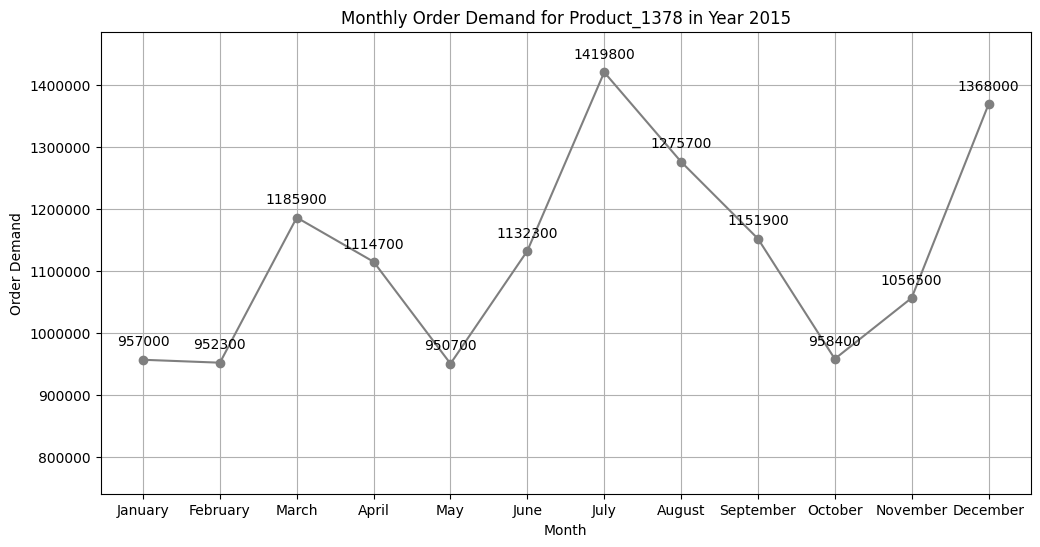

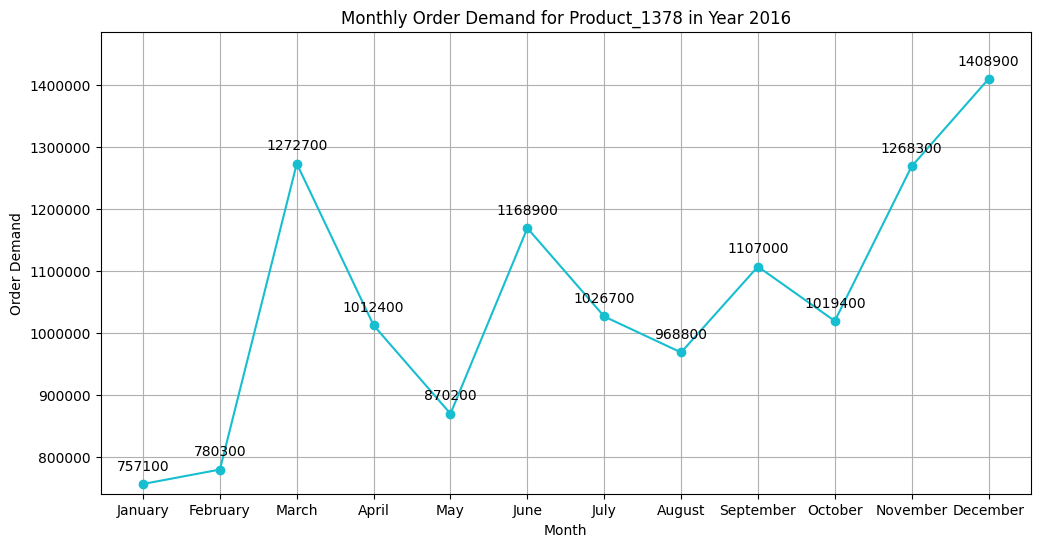

In [ ]:
#@title ##**`Product_1378: Monthly demand distribution per year.`**
import matplotlib.pyplot as plt

# Get the grouped DataFrame for Product_1378
product_1378_grouped_df = grouped_product_dataframes.get('Product_1378')

if product_1378_grouped_df is not None:
    # Identify years with zero order demand in any month
    years_with_zero_demand = product_1378_grouped_df.groupby('Year')['Order'].min()
    years_to_exclude = years_with_zero_demand[years_with_zero_demand == 0].index.tolist()

    # Filter out years with zero order demand
    product_1378_filtered_df = product_1378_grouped_df[~product_1378_grouped_df['Year'].isin(years_to_exclude)].copy()

    # Get unique years for Product_1378 after filtering
    years_1378 = product_1378_filtered_df['Year'].unique()

    # Find the global minimum and maximum order values for consistent y-axis
    global_min_order = product_1378_filtered_df['Order'].min()
    global_max_order = product_1378_filtered_df['Order'].max()

    # Create a separate plot for each year for Product_1378
    colors = plt.cm.get_cmap('tab10', len(years_1378))
    for i, year in enumerate(years_1378):
        df_year_1378 = product_1378_filtered_df[product_1378_filtered_df['Year'] == year]

        plt.figure(figsize=(12, 6))
        plt.plot(df_year_1378['Month'], df_year_1378['Order'], marker='o', color=colors(i))

        # Add text labels for order values
        for j, txt in enumerate(df_year_1378['Order']):
            plt.annotate(f'{txt:.0f}', (df_year_1378['Month'].iloc[j], df_year_1378['Order'].iloc[j]), textcoords="offset points", xytext=(0,10), ha='center')

        plt.xlabel('Month')
        plt.ylabel('Order Demand')
        plt.title(f'Monthly Order Demand for Product_1378 in Year {year}')
        plt.grid(True)
        plt.ticklabel_format(style='plain', axis='y') # Change y-axis format
        plt.ylim(global_min_order, global_max_order) # Set consistent y-axis limits
        plt.show()
else:
    print("Data for Product_1378 not found in grouped_product_dataframes.")

/tmp/ipython-input-4045302621.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(years_1286))


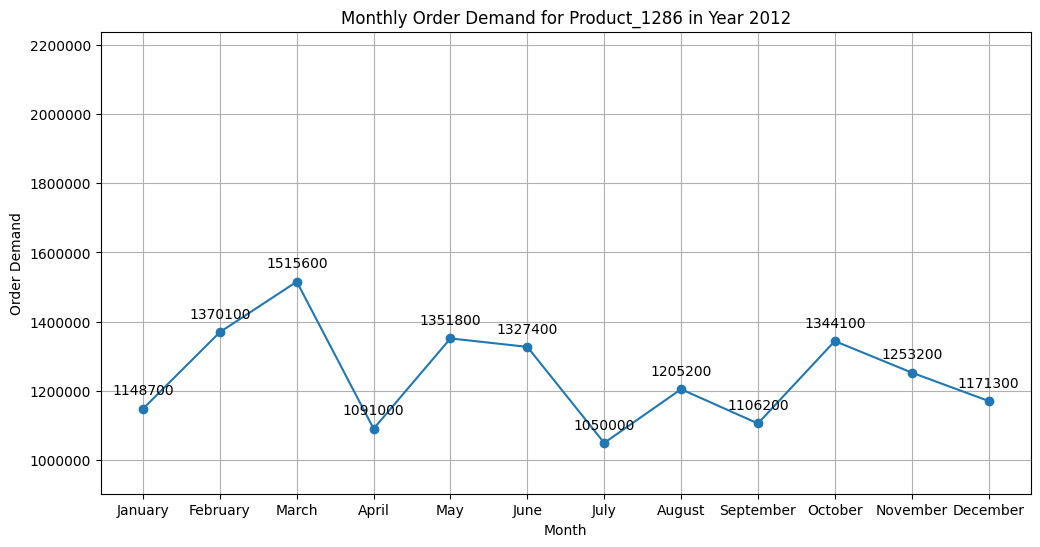

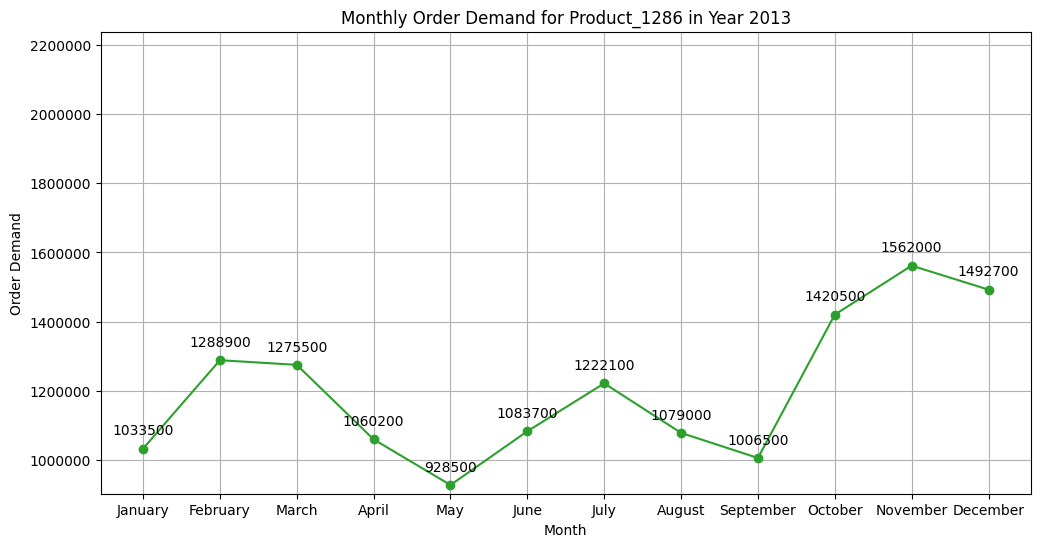

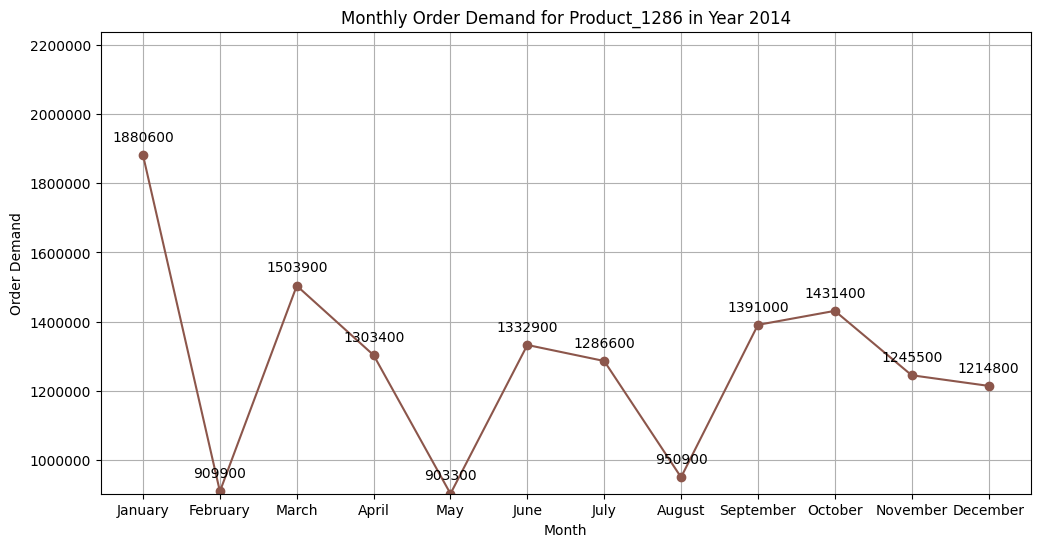

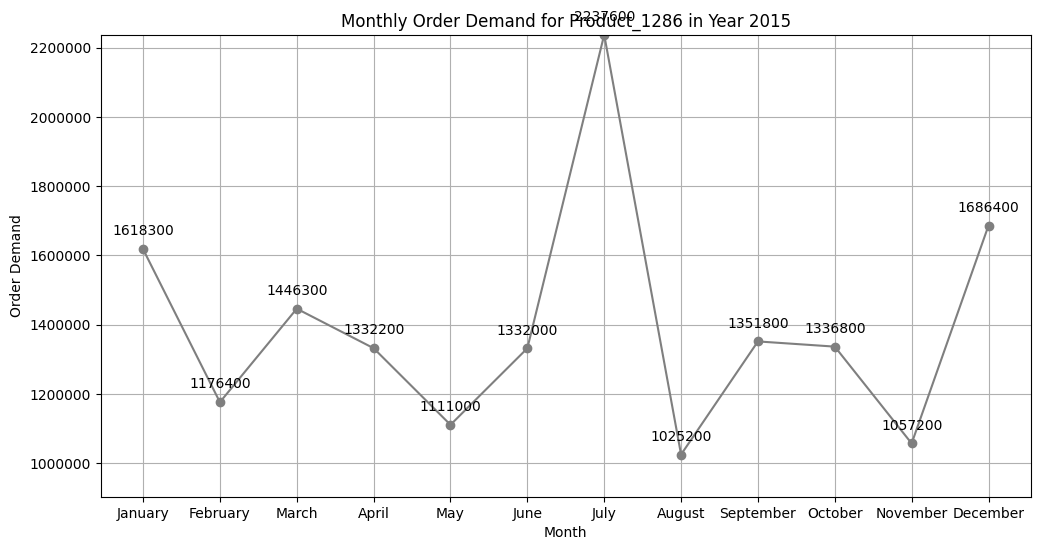

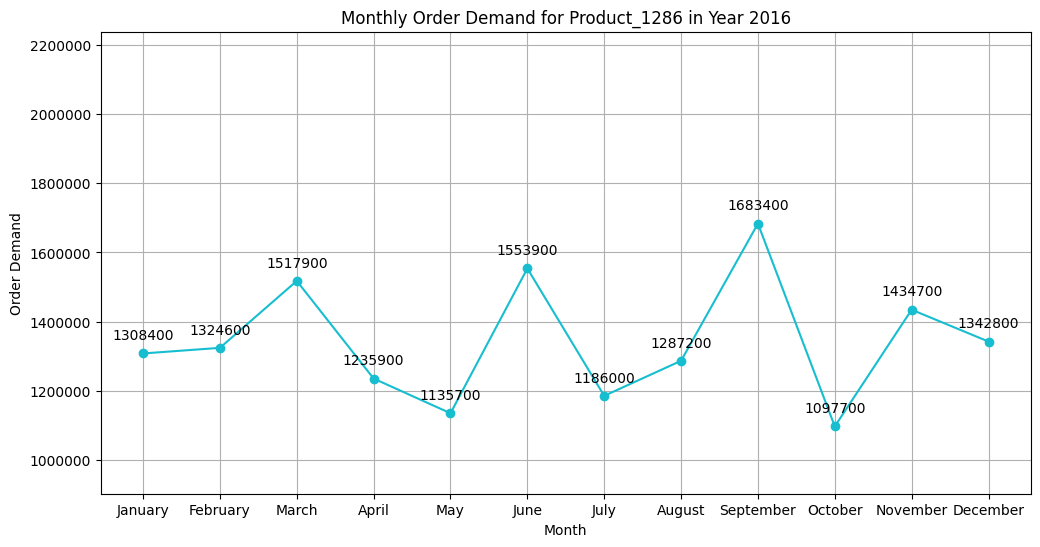

In [ ]:
#@title ##**`Product_1286: Monthly demand distribution per year.`**
import matplotlib.pyplot as plt

# Get the grouped DataFrame for Product_1286
product_1286_grouped_df = grouped_product_dataframes.get('Product_1286')

if product_1286_grouped_df is not None:
    # Identify years with zero order demand in any month
    years_with_zero_demand = product_1286_grouped_df.groupby('Year')['Order'].min()
    years_to_exclude = years_with_zero_demand[years_with_zero_demand == 0].index.tolist()

    # Filter out years with zero order demand
    product_1286_filtered_df = product_1286_grouped_df[~product_1286_grouped_df['Year'].isin(years_to_exclude)].copy()

    # Get unique years for Product_1286 after filtering
    years_1286 = product_1286_filtered_df['Year'].unique()

    # Find the global minimum and maximum order values for consistent y-axis
    global_min_order = product_1286_filtered_df['Order'].min()
    global_max_order = product_1286_filtered_df['Order'].max()


    # Create a separate plot for each year for Product_1286
    colors = plt.cm.get_cmap('tab10', len(years_1286))
    for i, year in enumerate(years_1286):
        df_year_1286 = product_1286_filtered_df[product_1286_filtered_df['Year'] == year]

        plt.figure(figsize=(12, 6))
        plt.plot(df_year_1286['Month'], df_year_1286['Order'], marker='o', color=colors(i))

        # Add text labels for order values
        for j, txt in enumerate(df_year_1286['Order']):
            plt.annotate(f'{txt:.0f}', (df_year_1286['Month'].iloc[j], df_year_1286['Order'].iloc[j]), textcoords="offset points", xytext=(0,10), ha='center')


        plt.xlabel('Month')
        plt.ylabel('Order Demand')
        plt.title(f'Monthly Order Demand for Product_1286 in Year {year}')
        plt.grid(True)
        plt.ticklabel_format(style='plain', axis='y') # Change y-axis format
        plt.ylim(global_min_order, global_max_order) # Set consistent y-axis limits
        plt.show()
else:
    print("Data for Product_1286 not found in grouped_product_dataframes.")

/tmp/ipython-input-1089992757.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(years_1382))


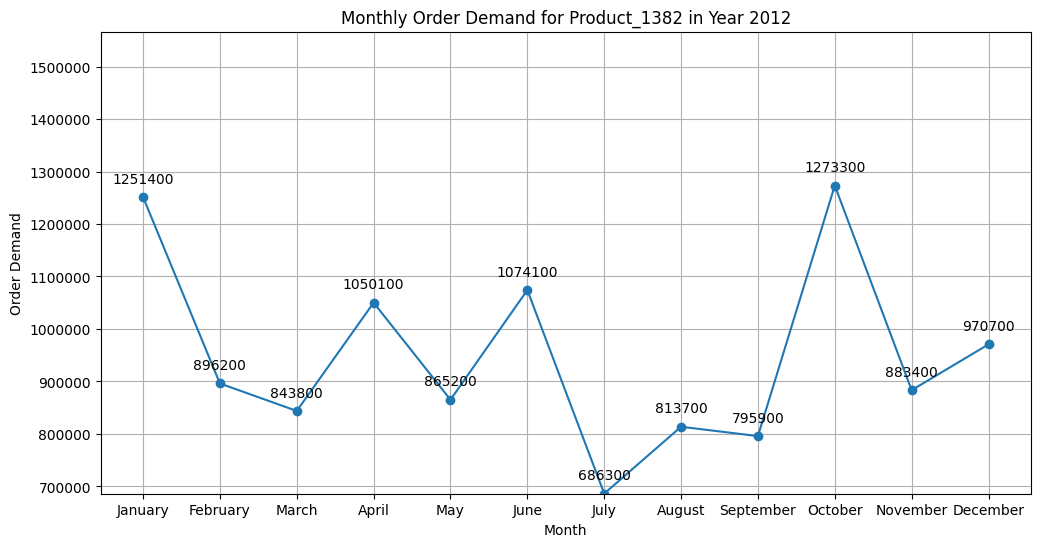

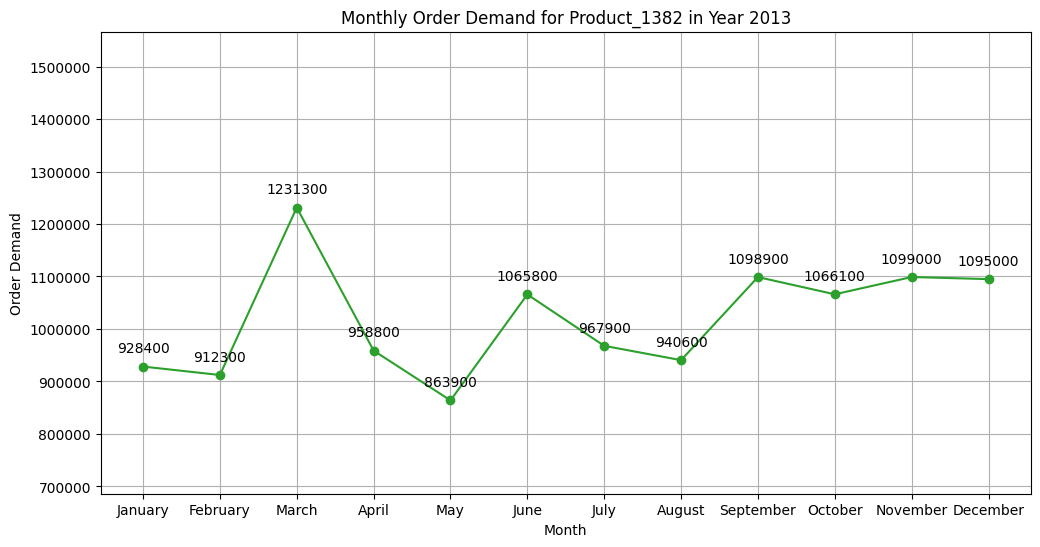

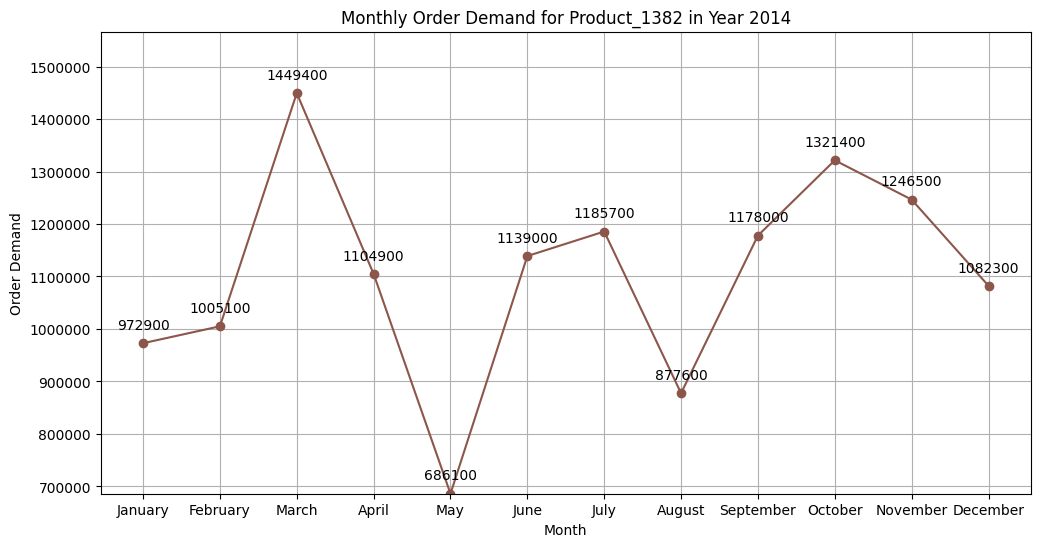

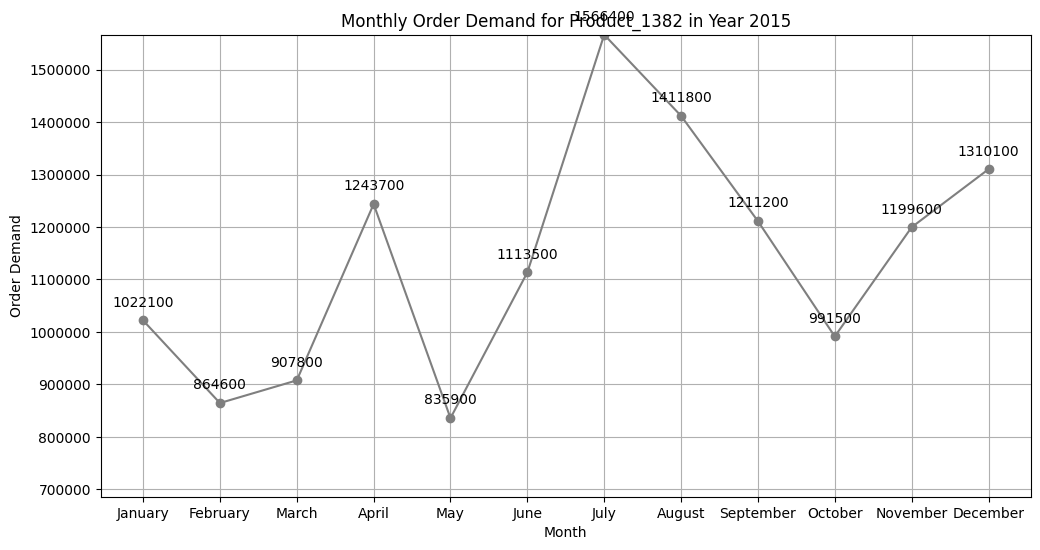

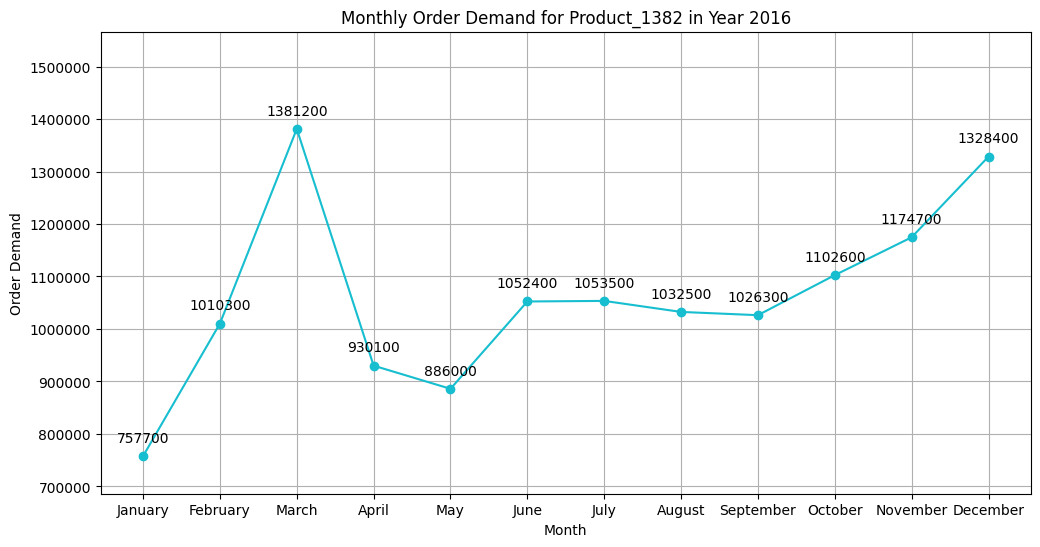

In [ ]:
#@title ##**`Product_1382: Monthly demand distribution per year.`**
import matplotlib.pyplot as plt

# Get the grouped DataFrame for Product_1382
product_1382_grouped_df = grouped_product_dataframes.get('Product_1382')

if product_1382_grouped_df is not None:
    # Identify years with zero order demand in any month
    years_with_zero_demand = product_1382_grouped_df.groupby('Year')['Order'].min()
    years_to_exclude = years_with_zero_demand[years_with_zero_demand == 0].index.tolist()

    # Filter out years with zero order demand
    product_1382_filtered_df = product_1382_grouped_df[~product_1382_grouped_df['Year'].isin(years_to_exclude)].copy()

    # Get unique years for Product_1382 after filtering
    years_1382 = product_1382_filtered_df['Year'].unique()

    # Find the global minimum and maximum order values for consistent y-axis
    global_min_order = product_1382_filtered_df['Order'].min()
    global_max_order = product_1382_filtered_df['Order'].max()

    # Create a separate plot for each year for Product_1382
    colors = plt.cm.get_cmap('tab10', len(years_1382))
    for i, year in enumerate(years_1382):
        df_year_1382 = product_1382_filtered_df[product_1382_filtered_df['Year'] == year]

        plt.figure(figsize=(12, 6))
        plt.plot(df_year_1382['Month'], df_year_1382['Order'], marker='o', color=colors(i))

        # Add text labels for order values
        for j, txt in enumerate(df_year_1382['Order']):
            plt.annotate(f'{txt:.0f}', (df_year_1382['Month'].iloc[j], df_year_1382['Order'].iloc[j]), textcoords="offset points", xytext=(0,10), ha='center')

        plt.xlabel('Month')
        plt.ylabel('Order Demand')
        plt.title(f'Monthly Order Demand for Product_1382 in Year {year}')
        plt.grid(True)
        plt.ticklabel_format(style='plain', axis='y') # Change y-axis format
        plt.ylim(global_min_order, global_max_order) # Set consistent y-axis limits
        plt.show()
else:
    print("Data for Product_1382 not found in grouped_product_dataframes.")

/tmp/ipython-input-726499578.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(years_1294))


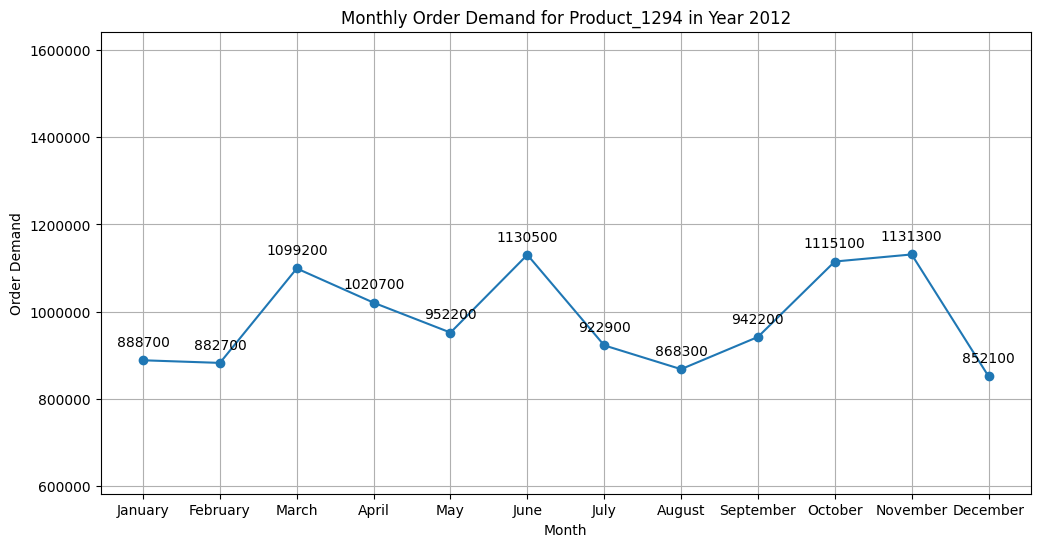

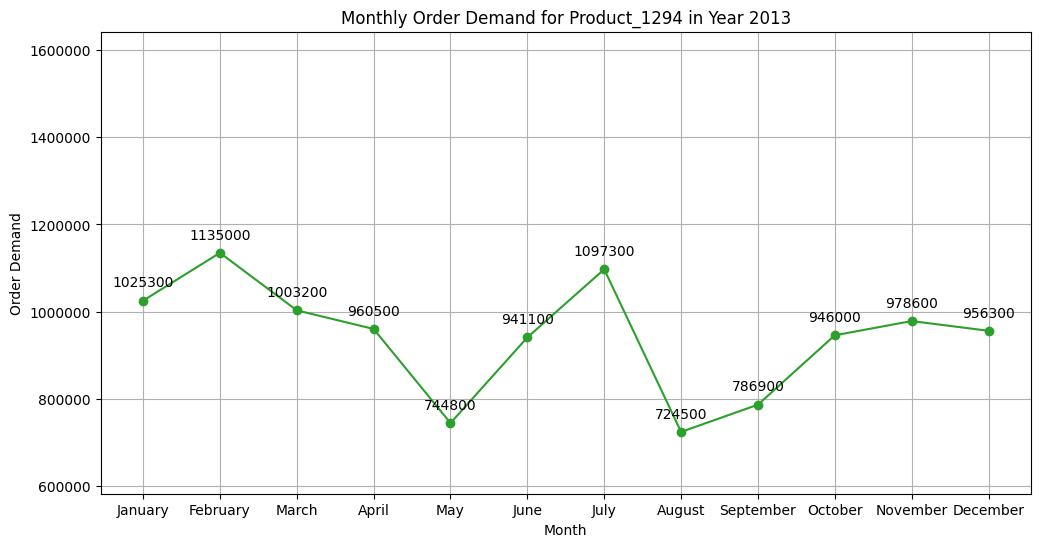

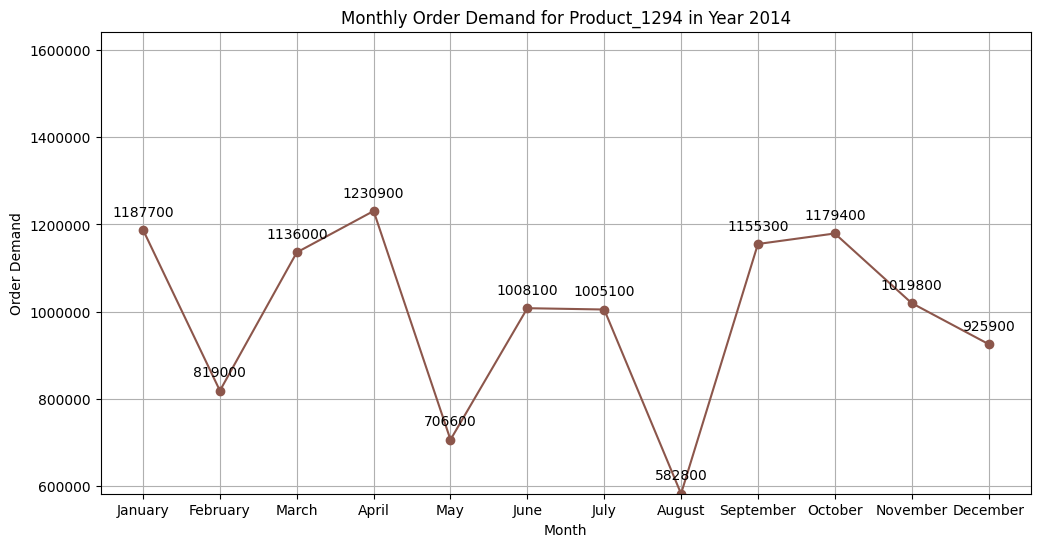

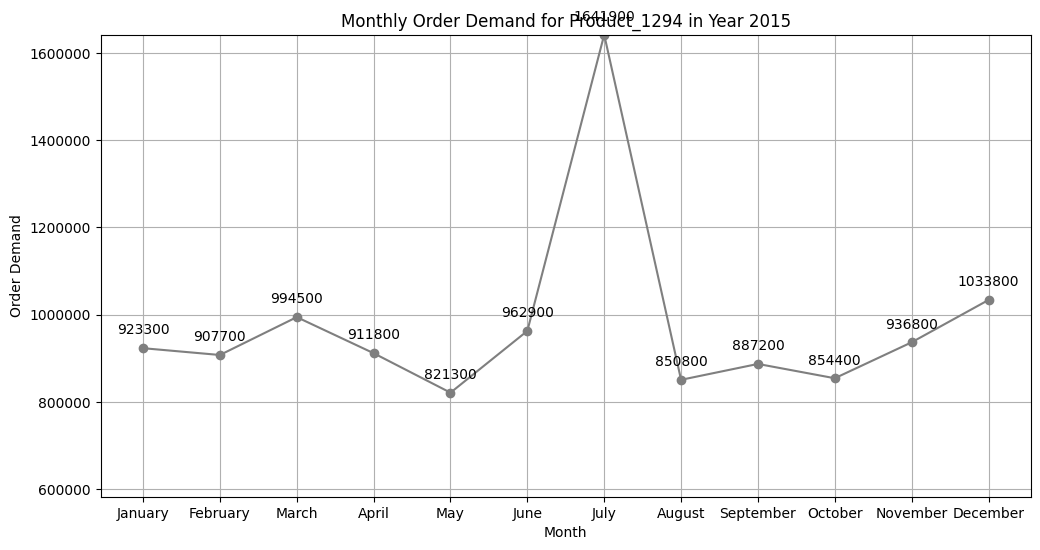

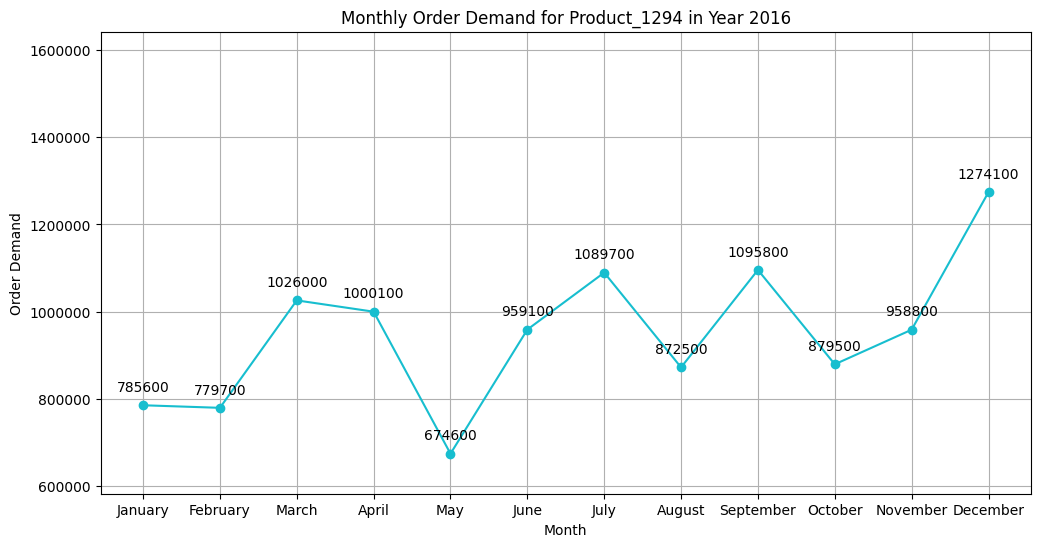

In [ ]:
#@title ##**`Product_1294: Monthly demand distribution per year.`**
import matplotlib.pyplot as plt

# Get the grouped DataFrame for Product_1294
product_1294_grouped_df = grouped_product_dataframes.get('Product_1294')

if product_1294_grouped_df is not None:
    # Identify years with zero order demand in any month
    years_with_zero_demand = product_1294_grouped_df.groupby('Year')['Order'].min()
    years_to_exclude = years_with_zero_demand[years_with_zero_demand == 0].index.tolist()

    # Filter out years with zero order demand
    product_1294_filtered_df = product_1294_grouped_df[~product_1294_grouped_df['Year'].isin(years_to_exclude)].copy()

    # Get unique years for Product_1294 after filtering
    years_1294 = product_1294_filtered_df['Year'].unique()

    # Find the global minimum and maximum order values for consistent y-axis
    global_min_order = product_1294_filtered_df['Order'].min()
    global_max_order = product_1294_filtered_df['Order'].max()

    # Create a separate plot for each year for Product_1294
    colors = plt.cm.get_cmap('tab10', len(years_1294))
    for i, year in enumerate(years_1294):
        # Filter the DataFrame for the current year
        df_year_1294 = product_1294_filtered_df[product_1294_filtered_df['Year'] == year]

        plt.figure(figsize=(12, 6))
        plt.plot(df_year_1294['Month'], df_year_1294['Order'], marker='o', color=colors(i))

        # Add text labels for order values
        for j, txt in enumerate(df_year_1294['Order']):
            plt.annotate(f'{txt:.0f}', (df_year_1294['Month'].iloc[j], df_year_1294['Order'].iloc[j]), textcoords="offset points", xytext=(0,10), ha='center')

        plt.xlabel('Month')
        plt.ylabel('Order Demand')
        plt.title(f'Monthly Order Demand for Product_1294 in Year {year}')
        plt.grid(True)
        plt.ticklabel_format(style='plain', axis='y') # Change y-axis format
        plt.ylim(global_min_order, global_max_order) # Set consistent y-axis limits
        plt.show()
else:
    print("Data for Product_1294 not found in grouped_product_dataframes.")

/tmp/ipython-input-1534864968.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(years_1453))


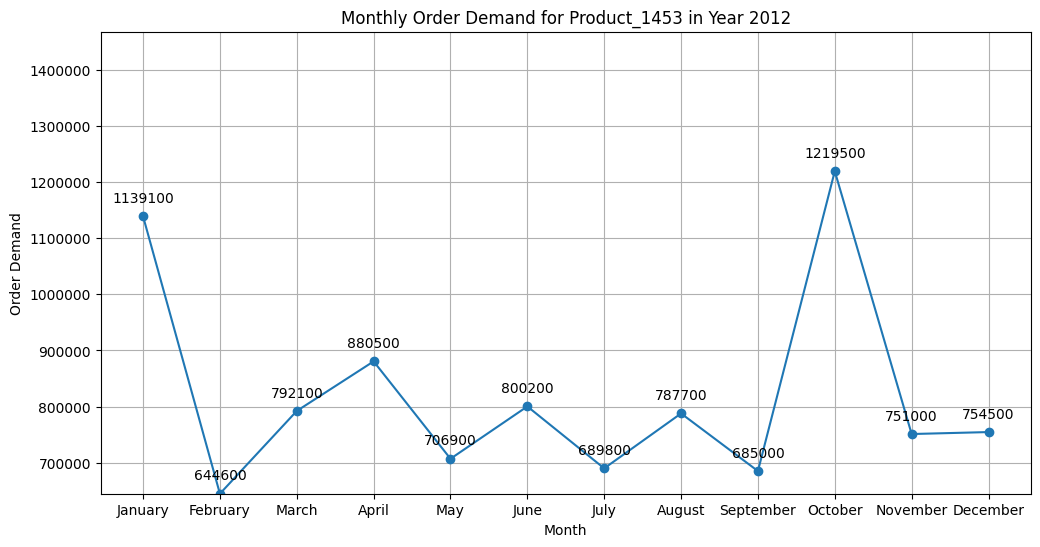

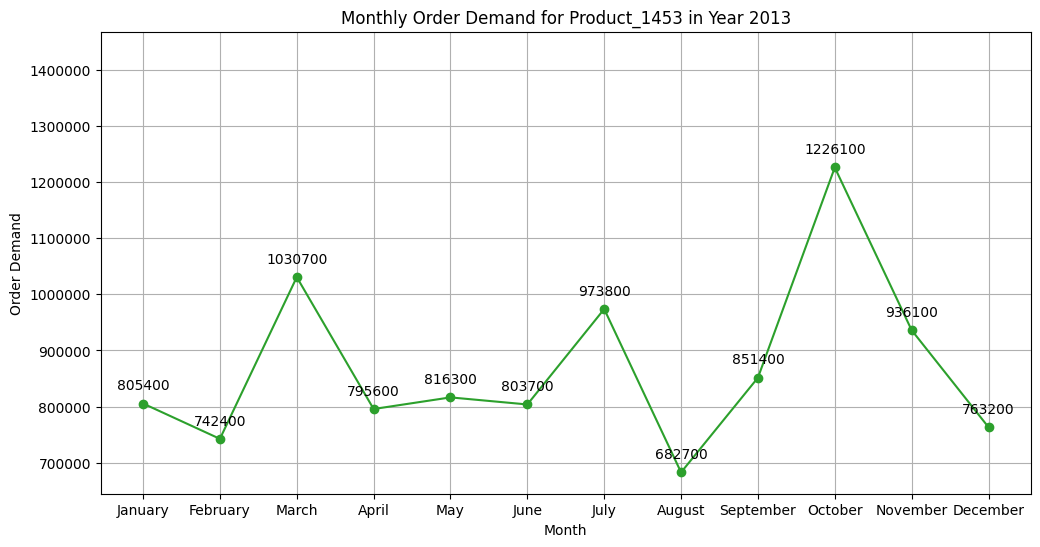

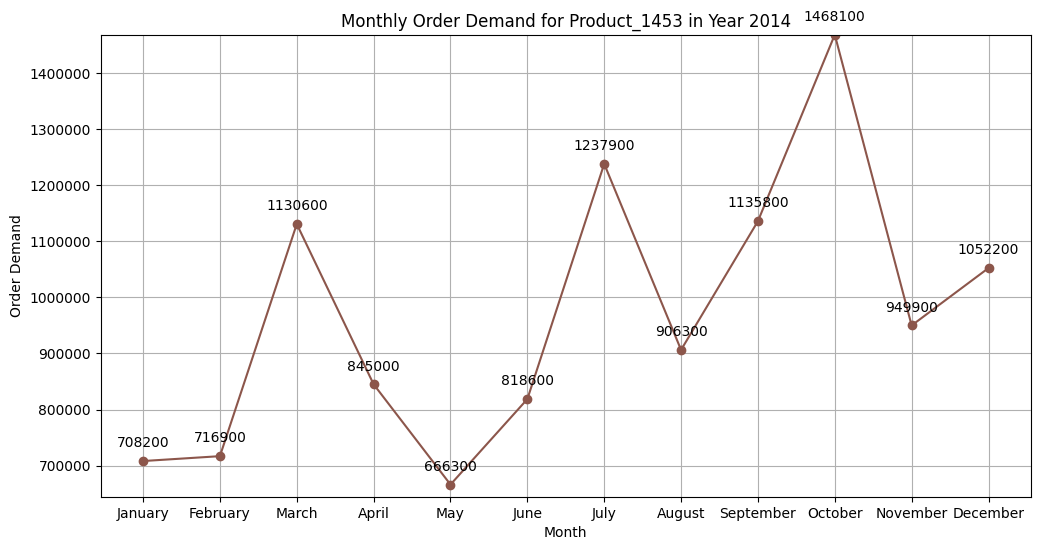

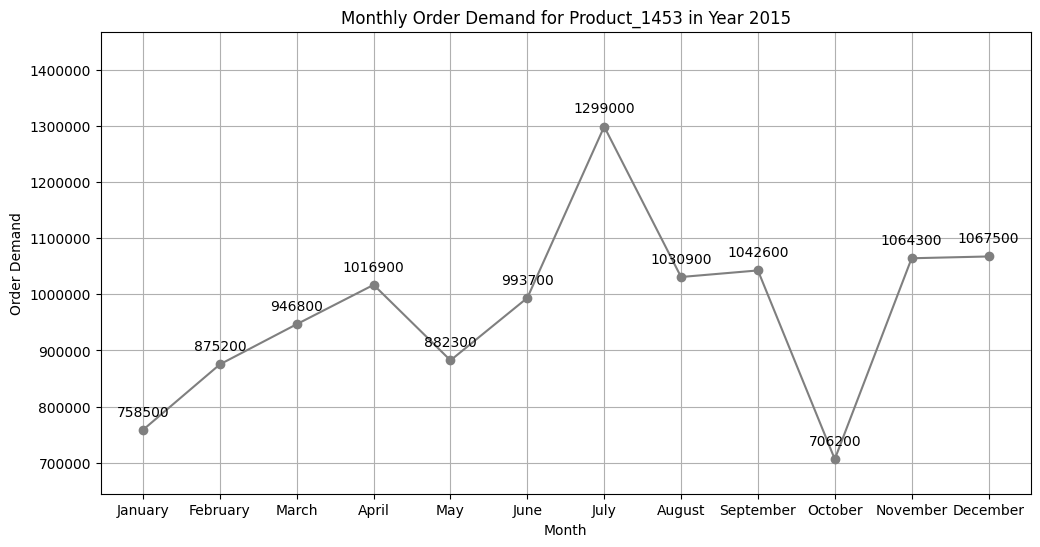

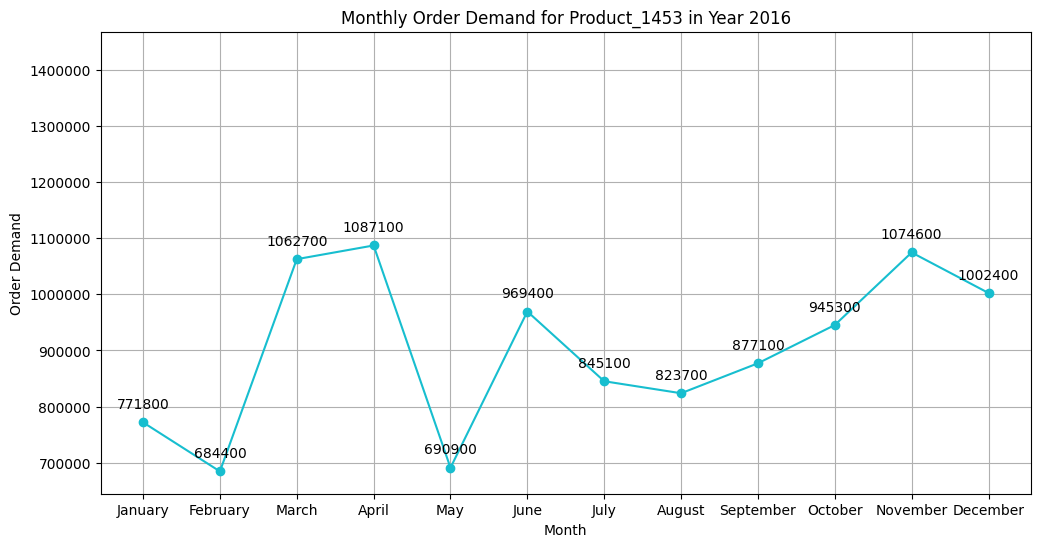

In [ ]:
#@title ##**`Product_1453: Monthly demand distribution per year.`**
import matplotlib.pyplot as plt

# Get the grouped DataFrame for Product_1453
product_1453_grouped_df = grouped_product_dataframes.get('Product_1453')

if product_1453_grouped_df is not None:
    # Identify years with zero order demand in any month
    years_with_zero_demand = product_1453_grouped_df.groupby('Year')['Order'].min()
    years_to_exclude = years_with_zero_demand[years_with_zero_demand == 0].index.tolist()

    # Filter out years with zero order demand
    product_1453_filtered_df = product_1453_grouped_df[~product_1453_grouped_df['Year'].isin(years_to_exclude)].copy()

    # Get unique years for Product_1453 after filtering
    years_1453 = product_1453_filtered_df['Year'].unique()

    # Find the global minimum and maximum order values for consistent y-axis
    global_min_order = product_1453_filtered_df['Order'].min()
    global_max_order = product_1453_filtered_df['Order'].max()

    # Create a separate plot for each year for Product_1453
    colors = plt.cm.get_cmap('tab10', len(years_1453))
    for i, year in enumerate(years_1453):
        df_year_1453 = product_1453_filtered_df[product_1453_filtered_df['Year'] == year]

        plt.figure(figsize=(12, 6))
        plt.plot(df_year_1453['Month'], df_year_1453['Order'], marker='o', color=colors(i))

        # Add text labels for order values
        for j, txt in enumerate(df_year_1453['Order']):
            plt.annotate(f'{txt:.0f}', (df_year_1453['Month'].iloc[j], df_year_1453['Order'].iloc[j]), textcoords="offset points", xytext=(0,10), ha='center')

        plt.xlabel('Month')
        plt.ylabel('Order Demand')
        plt.title(f'Monthly Order Demand for Product_1453 in Year {year}')
        plt.grid(True)
        plt.ticklabel_format(style='plain', axis='y') # Change y-axis format
        plt.ylim(global_min_order, global_max_order) # Set consistent y-axis limits
        plt.show()
else:
    print("Data for Product_1453 not found in grouped_product_dataframes.")

/tmp/ipython-input-965949327.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(years_1377))


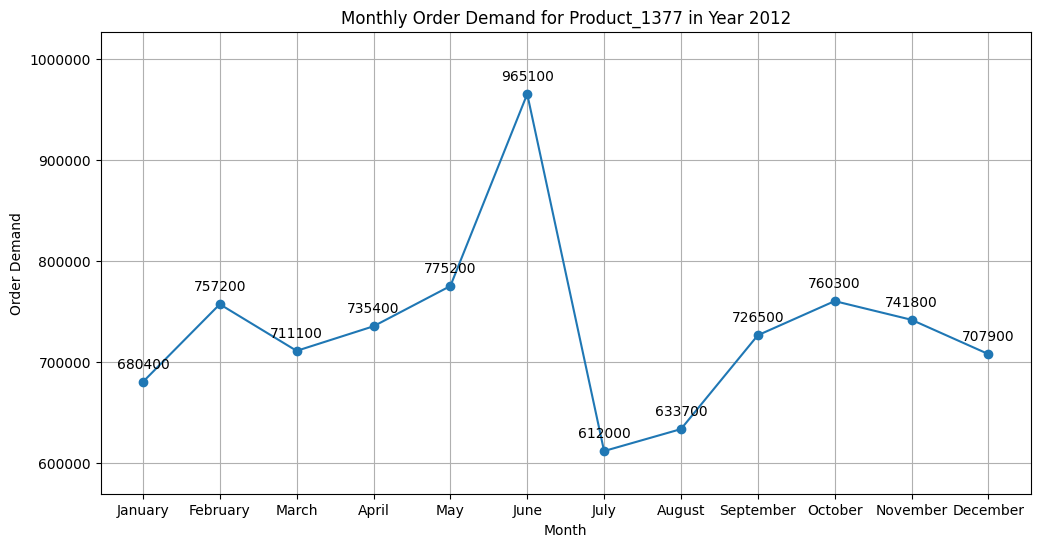

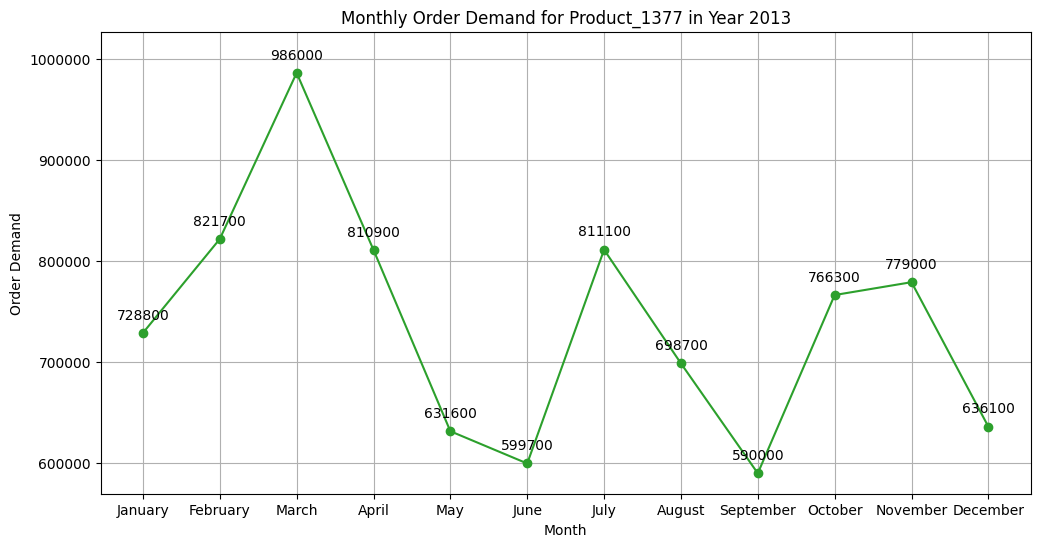

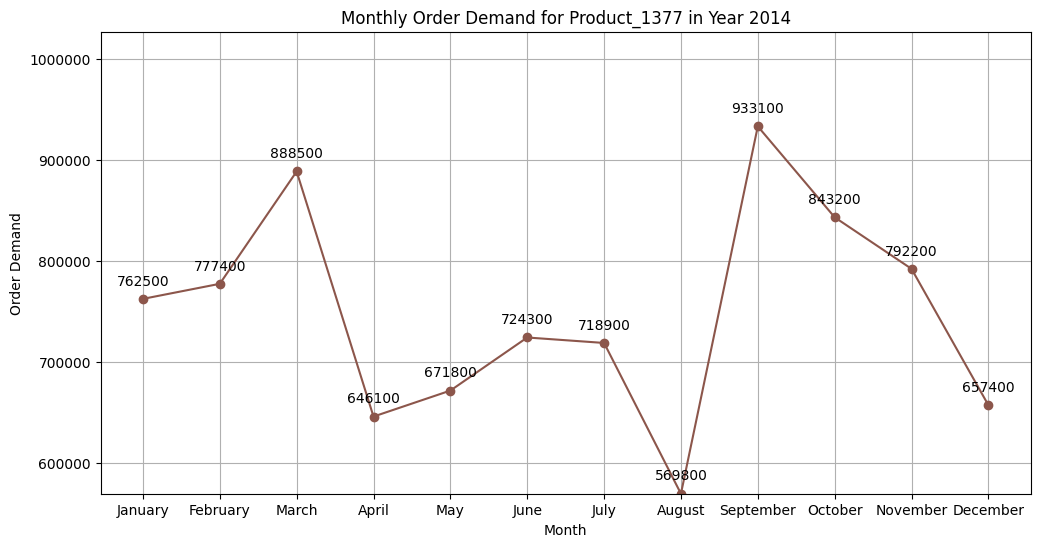

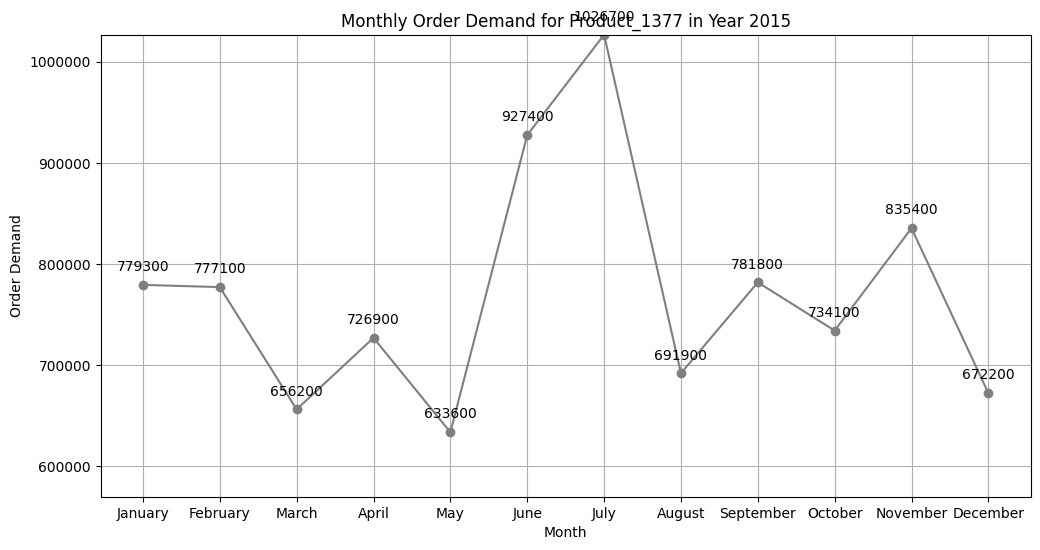

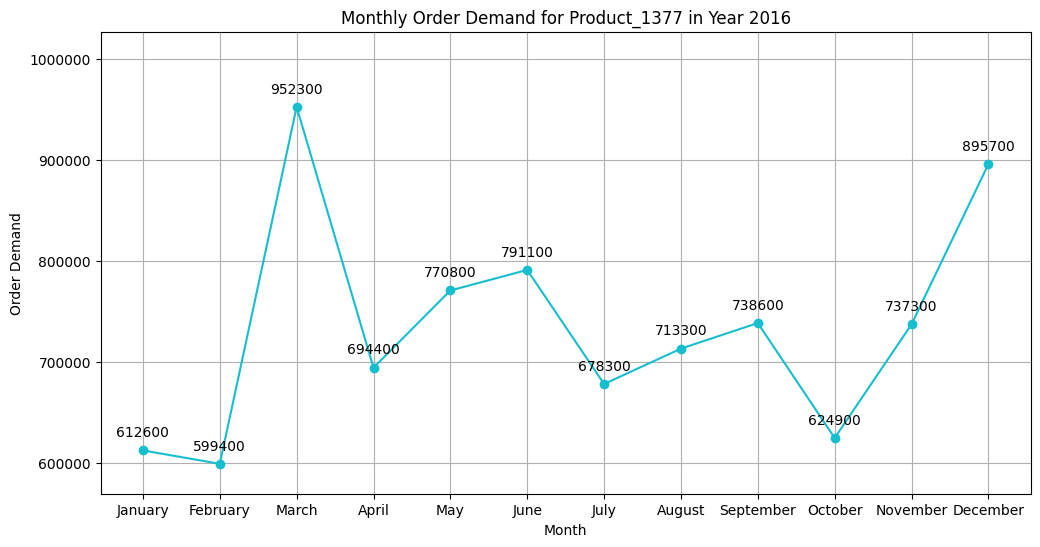

In [ ]:
#@title ##**`Product_1377: Monthly demand distribution per year.`**
import matplotlib.pyplot as plt

# Get the grouped DataFrame for Product_1377
product_1377_grouped_df = grouped_product_dataframes.get('Product_1377')

if product_1377_grouped_df is not None:
    # Identify years with zero order demand in any month
    years_with_zero_demand = product_1377_grouped_df.groupby('Year')['Order'].min()
    years_to_exclude = years_with_zero_demand[years_with_zero_demand == 0].index.tolist()

    # Filter out years with zero order demand
    product_1377_filtered_df = product_1377_grouped_df[~product_1377_grouped_df['Year'].isin(years_to_exclude)].copy()

    # Get unique years for Product_1377 after filtering
    years_1377 = product_1377_filtered_df['Year'].unique()

    # Find the global minimum and maximum order values for consistent y-axis
    global_min_order = product_1377_filtered_df['Order'].min()
    global_max_order = product_1377_filtered_df['Order'].max()

    # Create a separate plot for each year for Product_1377
    colors = plt.cm.get_cmap('tab10', len(years_1377))
    for i, year in enumerate(years_1377):
        df_year_1377 = product_1377_filtered_df[product_1377_filtered_df['Year'] == year]

        plt.figure(figsize=(12, 6))
        plt.plot(df_year_1377['Month'], df_year_1377['Order'], marker='o', color=colors(i))

        # Add text labels for order values
        for j, txt in enumerate(df_year_1377['Order']):
            plt.annotate(f'{txt:.0f}', (df_year_1377['Month'].iloc[j], df_year_1377['Order'].iloc[j]), textcoords="offset points", xytext=(0,10), ha='center')

        plt.xlabel('Month')
        plt.ylabel('Order Demand')
        plt.title(f'Monthly Order Demand for Product_1377 in Year {year}')
        plt.grid(True)
        plt.ticklabel_format(style='plain', axis='y') # Change y-axis format
        plt.ylim(global_min_order, global_max_order) # Set consistent y-axis limits
        plt.show()
else:
    print("Data for Product_1377 not found in grouped_product_dataframes.")

/tmp/ipython-input-3411487288.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(years_1287))


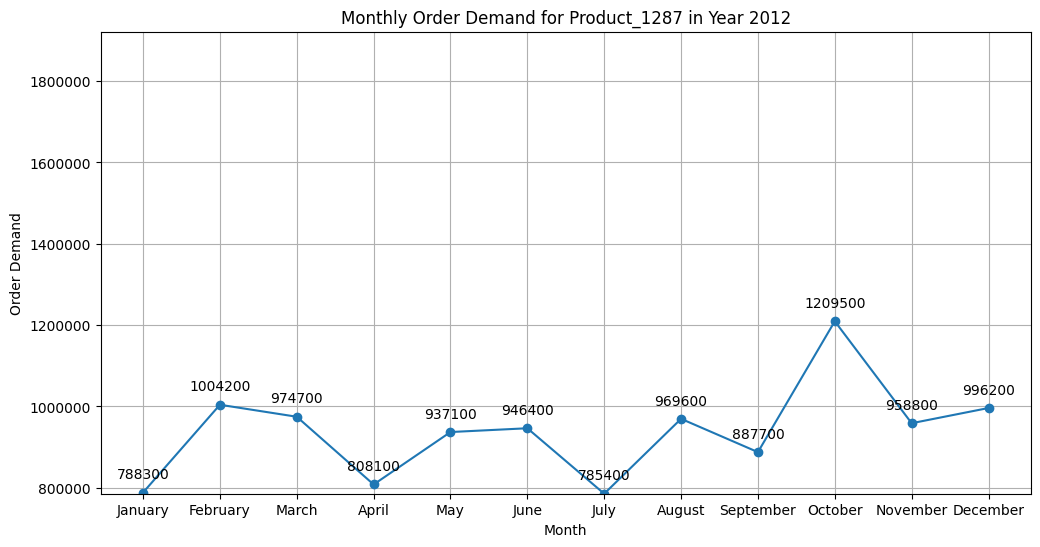

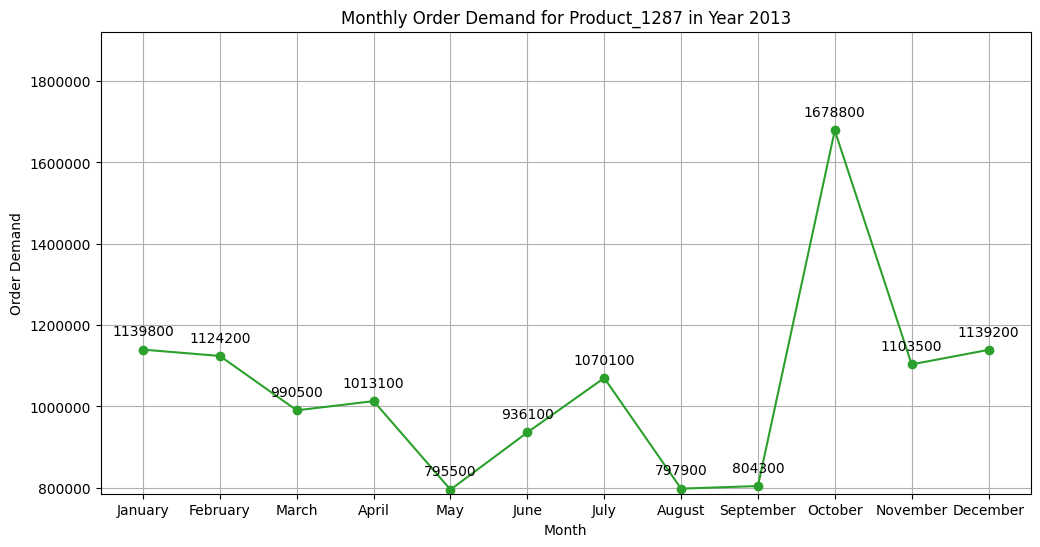

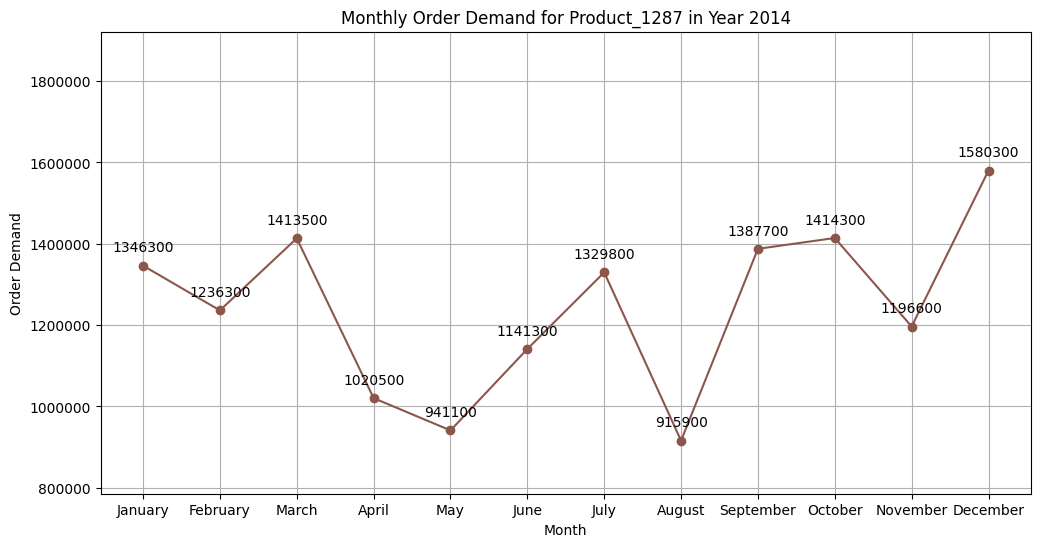

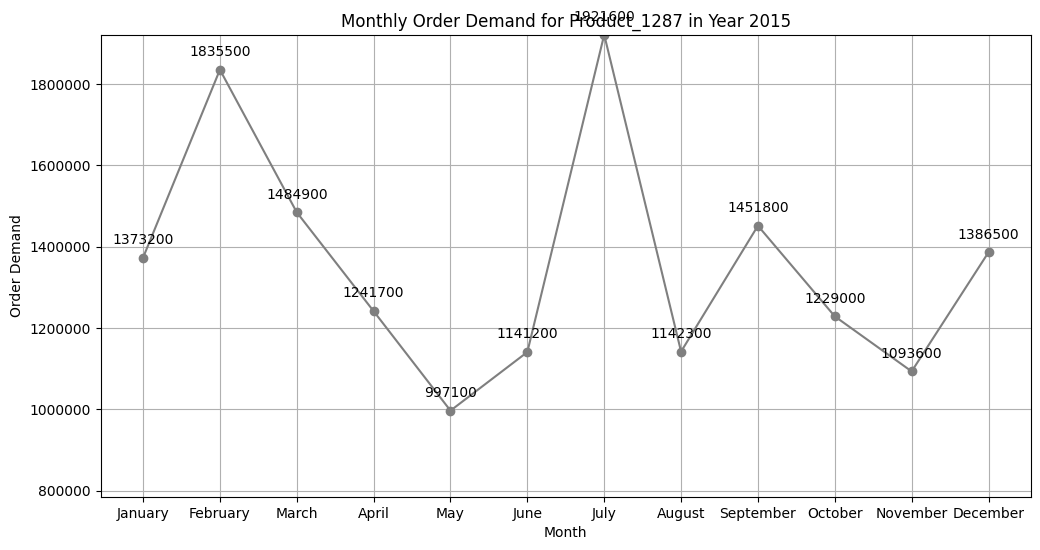

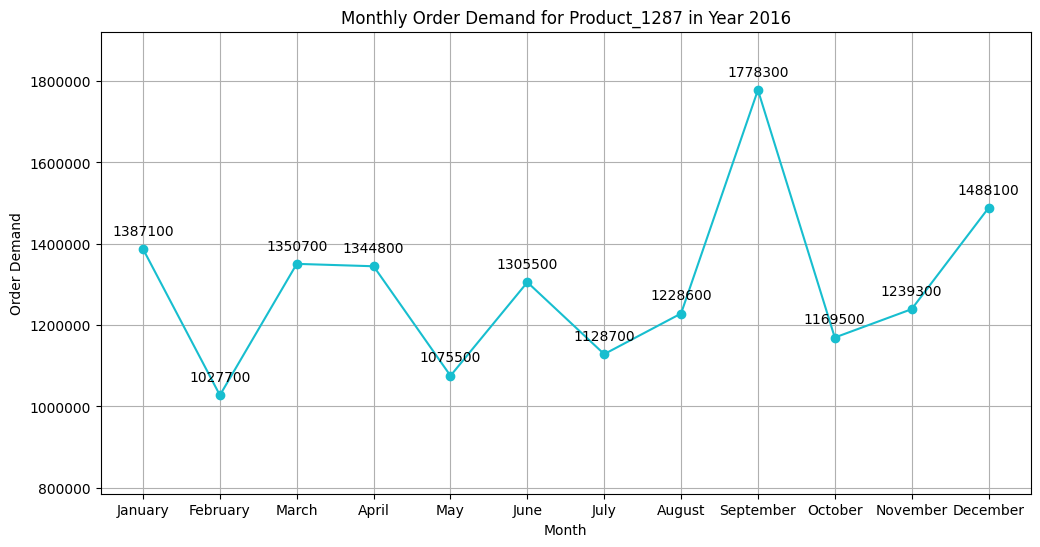

In [ ]:
#@title ##**`Product_1287: Monthly demand distribution per year.`**
import matplotlib.pyplot as plt

# Get the grouped DataFrame for Product_1287
product_1287_grouped_df = grouped_product_dataframes.get('Product_1287')

if product_1287_grouped_df is not None:
    # Identify years with zero order demand in any month
    years_with_zero_demand = product_1287_grouped_df.groupby('Year')['Order'].min()
    years_to_exclude = years_with_zero_demand[years_with_zero_demand == 0].index.tolist()

    # Filter out years with zero order demand
    product_1287_filtered_df = product_1287_grouped_df[~product_1287_grouped_df['Year'].isin(years_to_exclude)].copy()

    # Get unique years for Product_1287 after filtering
    years_1287 = product_1287_filtered_df['Year'].unique()

    # Find the global minimum and maximum order values for consistent y-axis
    global_min_order = product_1287_filtered_df['Order'].min()
    global_max_order = product_1287_filtered_df['Order'].max()

    # Create a separate plot for each year for Product_1287
    colors = plt.cm.get_cmap('tab10', len(years_1287))
    for i, year in enumerate(years_1287):
        df_year_1287 = product_1287_filtered_df[product_1287_filtered_df['Year'] == year]

        plt.figure(figsize=(12, 6))
        plt.plot(df_year_1287['Month'], df_year_1287['Order'], marker='o', color=colors(i))

        # Add text labels for order values
        for j, txt in enumerate(df_year_1287['Order']):
            plt.annotate(f'{txt:.0f}', (df_year_1287['Month'].iloc[j], df_year_1287['Order'].iloc[j]), textcoords="offset points", xytext=(0,10), ha='center')

        plt.xlabel('Month')
        plt.ylabel('Order Demand')
        plt.title(f'Monthly Order Demand for Product_1287 in Year {year}')
        plt.grid(True)
        plt.ticklabel_format(style='plain', axis='y') # Change y-axis format
        plt.ylim(global_min_order, global_max_order) # Set consistent y-axis limits
        plt.show()
else:
    print("Data for Product_1287 not found in grouped_product_dataframes.")

/tmp/ipython-input-2720671260.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(years_1274))


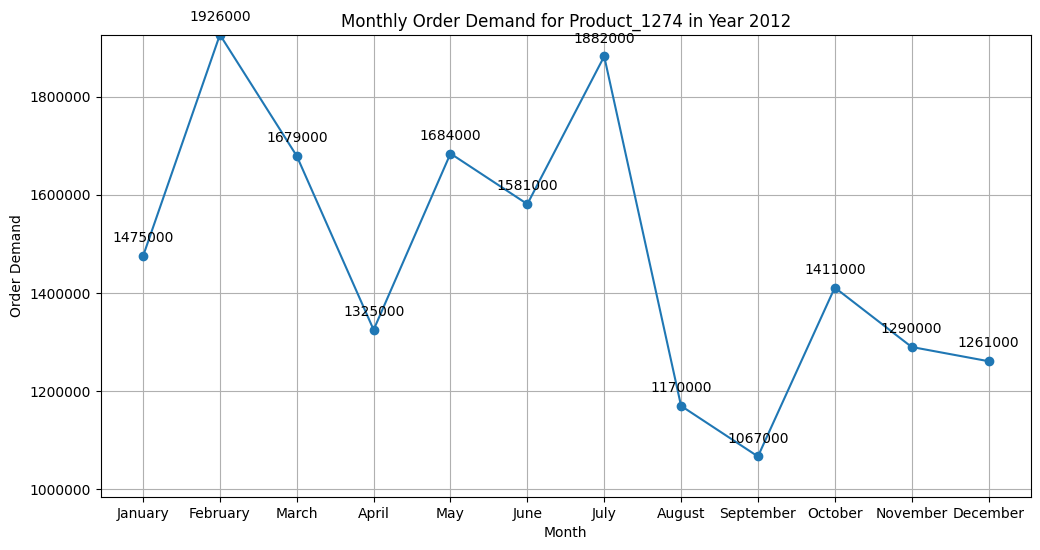

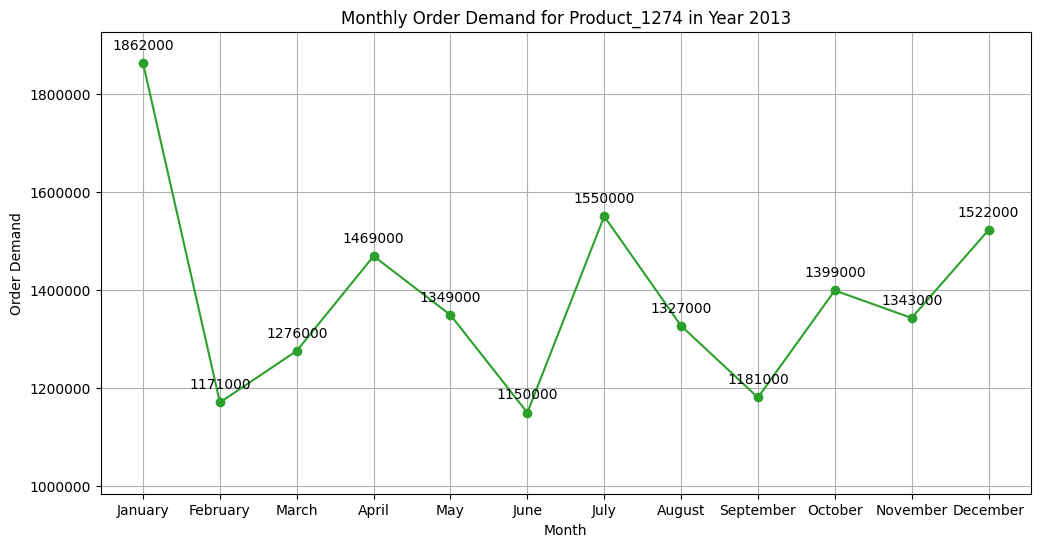

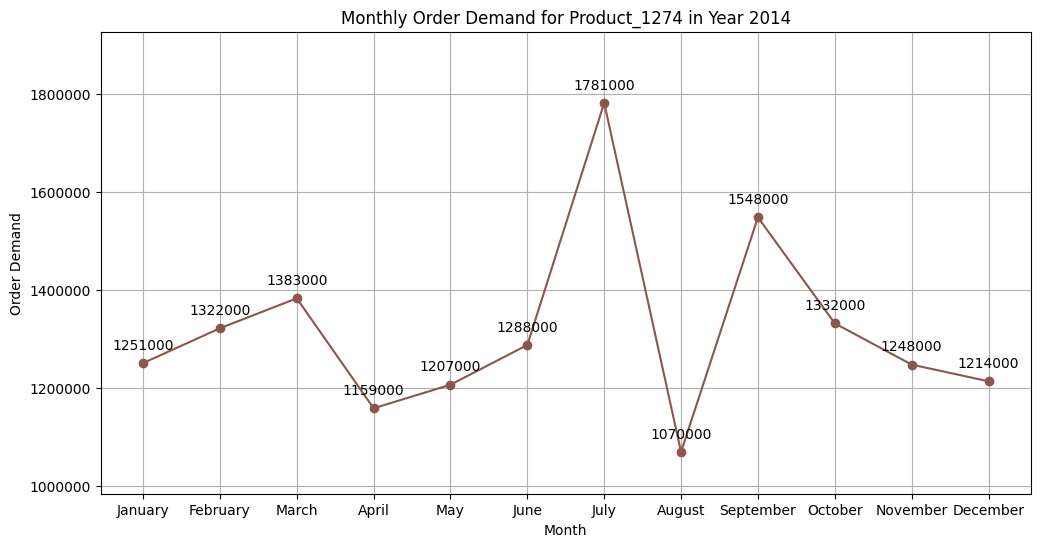

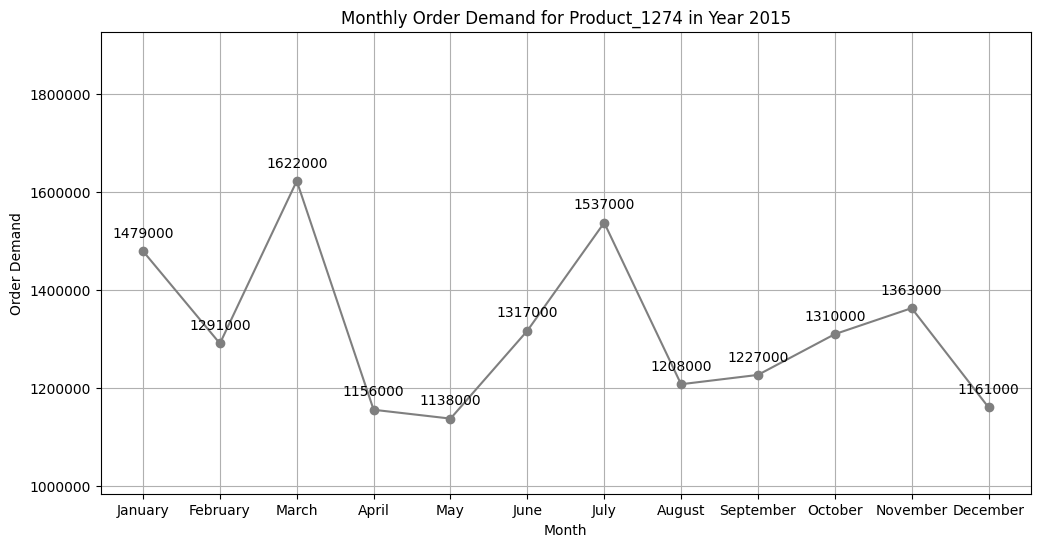

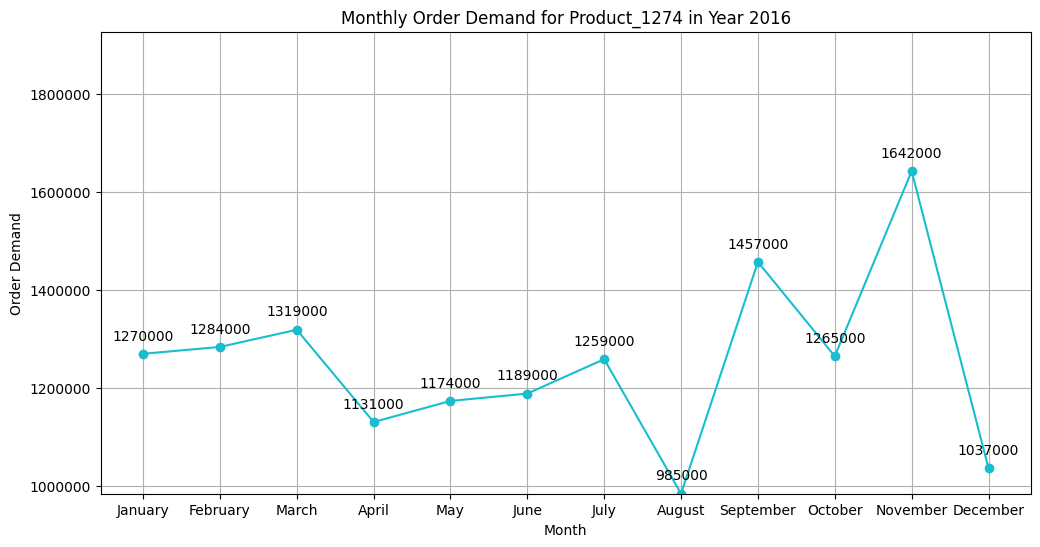

In [ ]:
#@title ##**`Product_1274: Monthly demand distribution per year.`**
import matplotlib.pyplot as plt

# Get the grouped DataFrame for Product_1274
product_1274_grouped_df = grouped_product_dataframes.get('Product_1274')

if product_1274_grouped_df is not None:
    # Identify years with zero order demand in any month
    years_with_zero_demand = product_1274_grouped_df.groupby('Year')['Order'].min()
    years_to_exclude = years_with_zero_demand[years_with_zero_demand == 0].index.tolist()

    # Filter out years with zero order demand
    product_1274_filtered_df = product_1274_grouped_df[~product_1274_grouped_df['Year'].isin(years_to_exclude)].copy()

    # Get unique years for Product_1274 after filtering
    years_1274 = product_1274_filtered_df['Year'].unique()

    # Find the global minimum and maximum order values for consistent y-axis
    global_min_order = product_1274_filtered_df['Order'].min()
    global_max_order = product_1274_filtered_df['Order'].max()

    # Create a separate plot for each year for Product_1274
    colors = plt.cm.get_cmap('tab10', len(years_1274))
    for i, year in enumerate(years_1274):
        df_year_1274 = product_1274_filtered_df[product_1274_filtered_df['Year'] == year]

        plt.figure(figsize=(12, 6))
        plt.plot(df_year_1274['Month'], df_year_1274['Order'], marker='o', color=colors(i))

        # Add text labels for order values
        for j, txt in enumerate(df_year_1274['Order']):
            plt.annotate(f'{txt:.0f}', (df_year_1274['Month'].iloc[j], df_year_1274['Order'].iloc[j]), textcoords="offset points", xytext=(0,10), ha='center')

        plt.xlabel('Month')
        plt.ylabel('Order Demand')
        plt.title(f'Monthly Order Demand for Product_1274 in Year {year}')
        plt.grid(True)
        plt.ticklabel_format(style='plain', axis='y') # Change y-axis format
        plt.ylim(global_min_order, global_max_order) # Set consistent y-axis limits
        plt.show()
else:
    print("Data for Product_1274 not found in grouped_product_dataframes.")

FUNCTION FOR 2-MONTHS SIMPLE MOVING AVERAGE.

In [ ]:
##FUNCTION FOR SIMPLE MOVING AVERAGE##
import matplotlib.pyplot as plt
import pandas as pd

def plot_sma_forecast_for_product_year(product_code, year, grouped_dataframes):
    """
    Plots the actual monthly order demand and 2-month Simple Moving Average forecast
    for a specific product and year.

    Args:
        product_code (str): The product code to plot.
        year (int): The year to plot.
        grouped_dataframes (dict): A dictionary containing grouped DataFrames for each product.
    """
    product_grouped_df = grouped_dataframes.get(product_code)

    if product_grouped_df is not None:
        # Filter data for the specified year and sort by month
        df_year = product_grouped_df[product_grouped_df['Year'] == year].sort_values(by='Month').copy()

        if not df_year.empty and len(df_year) >= 2:
            # Calculate 2-month Simple Moving Average of the actual order demand
            # The forecast for the next month is the SMA of the previous two months
            # Use min_periods=2 to ensure we have at least two data points
            df_year['2_Month_SMA_Forecast'] = df_year['Order'].rolling(window=2, min_periods=2).mean().shift(1)

            # Plotting the actual data and SMA forecast
            plt.figure(figsize=(12, 6))
            # Ensure the 'Month' column is treated as categorical for plotting
            plt.plot(df_year['Month'].astype('category'), df_year['Order'], marker='o', label='Actual Order Demand')
            plt.plot(df_year['Month'].astype('category'), df_year['2_Month_SMA_Forecast'], marker='o', label='2-Month SMA Forecast')

            plt.xlabel('Month')
            plt.ylabel('Order Demand')
            plt.title(f'Actual vs. 2-Month SMA Forecast for {product_code} in Year {year}')
            plt.legend()
            plt.grid(True)
            plt.ticklabel_format(style='plain', axis='y') # Change y-axis format
            # Set consistent y-axis limits based on the global minimum and maximum order values
            # Find the global minimum and maximum order values for consistent y-axis across years for this product
            global_min_order = product_grouped_df['Order'].min()
            global_max_order = product_grouped_df['Order'].max()
            plt.ylim(global_min_order, global_max_order)
            plt.show()

        elif len(df_year) < 2:
             print(f"Not enough data (less than 2 months) for {product_code} in year {year} to calculate 2-month SMA forecast.")
        else:
             print(f"No data found for {product_code} in year {year}.")
    else:
        print(f"Data for {product_code} not found in grouped_product_dataframes.")

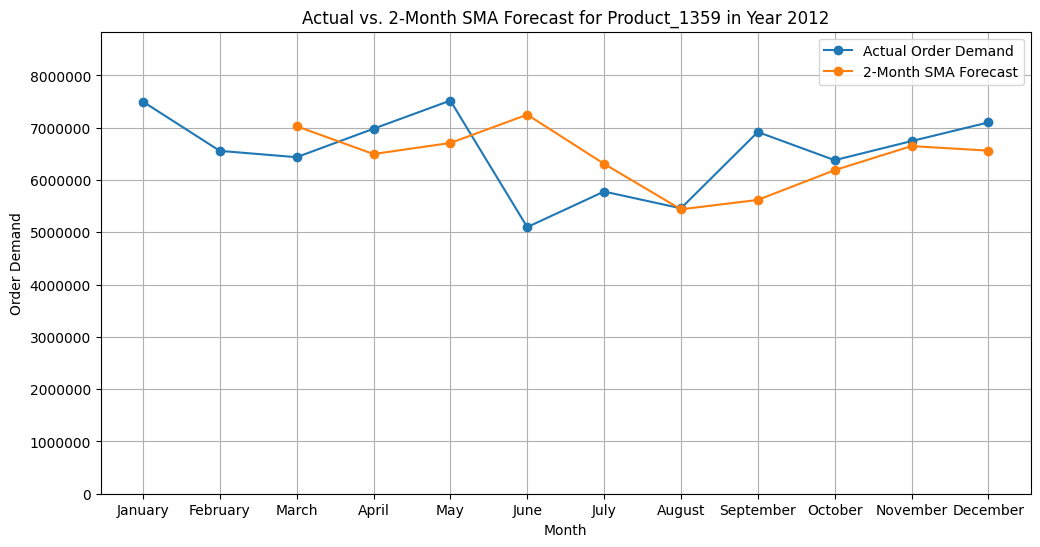

In [ ]:
#@title ##**`2-SIMPLE MOVING AVERAGE FORCASTE OF Product_1359 for year 2012`**
plot_sma_forecast_for_product_year("Product_1359",2012, grouped_product_dataframes)

FUNCTION FOR 3-MONTHS WEIGHTED MOVING AVERAGE.

In [ ]:
def plot_wma_forecast_for_product_year(product_code, year, weight_last_month, weight_two_months_ago, weight_three_months_ago, grouped_dataframes):
    """
    Plots the actual monthly order demand and 3-month Weighted Moving Average forecast
    for a specific product and year.

    Args:
        product_code (str): The product code to plot.
        year (int): The year to plot.
        weight_last_month (float): The weight for the last month.
        weight_two_months_ago (float): The weight for two months ago.
        weight_three_months_ago (float): The weight for three months ago.
        grouped_dataframes (dict): A dictionary containing grouped DataFrames for each product.
    """
    product_grouped_df = grouped_dataframes.get(product_code)

    if product_grouped_df is not None:
        # Filter data for the specified year and sort by month
        df_year = product_grouped_df[product_grouped_df['Year'] == year].sort_values(by='Month').copy()

        if not df_year.empty and len(df_year) >= 3:
            # Calculate 3-month Weighted Moving Average of the actual order demand
            # The forecast for the next month is the WMA of the previous three months
            # Use min_periods=3 to ensure we have at least three data points
            weights = [weight_three_months_ago, weight_two_months_ago, weight_last_month]
            df_year['3_Month_WMA_Forecast'] = df_year['Order'].rolling(window=3, min_periods=3).apply(lambda x: (weights * x).sum() / sum(weights), raw=True).shift(1)


            # Plotting the actual data and WMA forecast
            plt.figure(figsize=(12, 6))
            # Ensure the 'Month' column is treated as categorical for plotting
            plt.plot(df_year['Month'].astype('category'), df_year['Order'], marker='o', label='Actual Order Demand')
            plt.plot(df_year['Month'].astype('category'), df_year['3_Month_WMA_Forecast'], marker='o', label='3-Month WMA Forecast')

            plt.xlabel('Month')
            plt.ylabel('Order Demand')
            plt.title(f'Actual vs. 3-Month WMA Forecast for {product_code} in Year {year}')
            plt.legend()
            plt.grid(True)
            plt.ticklabel_format(style='plain', axis='y') # Change y-axis format
            # Set consistent y-axis limits based on the global minimum and maximum order values
            # Find the global minimum and maximum order values for consistent y-axis across years for this product
            global_min_order = product_grouped_df['Order'].min()
            global_max_order = product_grouped_df['Order'].max()
            plt.ylim(global_min_order, global_max_order)
            plt.show()

        elif len(df_year) < 3:
             print(f"Not enough data (less than 3 months) for {product_code} in year {year} to calculate 3-month WMA forecast.")
        else:
             print(f"No data found for {product_code} in year {year}.")
    else:
        print(f"Data for {product_code} not found in grouped_product_dataframes.")

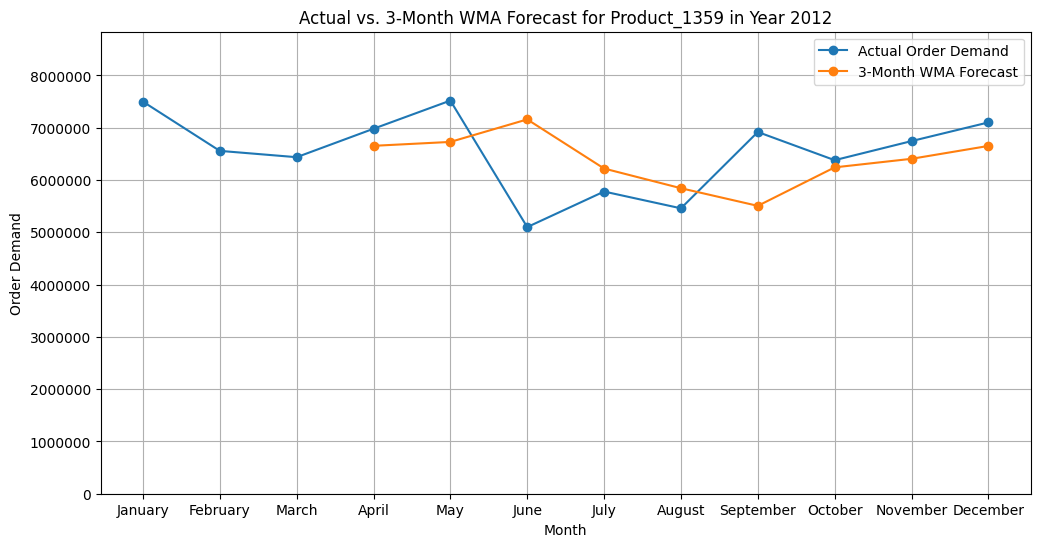

In [ ]:
#@title ##**`3-MONTHS WEIGHTED MOVING AVERAGE FORCASTE OF Product_1359 for year 2012`**
plot_wma_forecast_for_product_year("Product_1359",2012,3,2,1, grouped_product_dataframes)

FUNCTION FOR EXPONENTIAL SMOOTHING.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_exponential_smoothing_forecast(product_code, year, alpha, grouped_dataframes):
    """
    Plots the actual monthly order demand and Exponential Smoothing forecast
    for a specific product and year using the specified formula and initialization.

    Args:
        product_code (str): The product code to plot.
        year (int): The year to plot.
        alpha (float): The smoothing factor (between 0 and 1).
        grouped_dataframes (dict): A dictionary containing grouped DataFrames for each product.
    """
    product_grouped_df = grouped_dataframes.get(product_code)

    if product_grouped_df is not None:
        # Filter data for the specified year and sort by month
        df_year = product_grouped_df[product_grouped_df['Year'] == year].sort_values(by='Month').copy()

        if not df_year.empty:
            # Create a new column for Exponential Smoothing forecast
            df_year['Exponential_Smoothing_Forecast'] = 0.0

            # Initialize the forecast for February with January's actual demand
            if 'January' in df_year['Month'].values:
                january_demand = df_year[df_year['Month'] == 'January']['Order'].iloc[0]
                # Find the index for February in the filtered DataFrame for the current year
                february_index = df_year[df_year['Month'] == 'February'].index
                if not february_index.empty:
                    df_year.loc[february_index[0], 'Exponential_Smoothing_Forecast'] = january_demand
            else:
                print(f"January data not found for {product_code} in year {year}. Cannot initialize forecast.")
                return # Exit the function if January data is missing

            # Calculate exponential smoothing for the subsequent months starting from March
            months_in_year = df_year['Month'].tolist()
            start_index = months_in_year.index('February') + 1 if 'February' in months_in_year else None

            if start_index is not None:
                for i in range(start_index, len(df_year)):
                    # Get the actual demand and forecast from the previous month
                    prev_month_actual = df_year['Order'].iloc[i-1]
                    prev_month_forecast = df_year['Exponential_Smoothing_Forecast'].iloc[i-1]

                    # Calculate the current month's forecast using the specified formula
                    current_forecast = prev_month_forecast + alpha * (prev_month_actual - prev_month_forecast)
                    df_year.loc[df_year.index[i], 'Exponential_Smoothing_Forecast'] = current_forecast


            # Plotting the actual data and Exponential Smoothing forecast
            plt.figure(figsize=(12, 6))
            # Ensure the 'Month' column is treated as categorical for plotting
            plt.plot(df_year['Month'].astype('category'), df_year['Order'], marker='o', label='Actual Order Demand')
            plt.plot(df_year['Month'].astype('category'), df_year['Exponential_Smoothing_Forecast'], marker='o', label=f'Exponential Smoothing Forecast (alpha={alpha})')

            plt.xlabel('Month')
            plt.ylabel('Order Demand')
            plt.title(f'Actual vs. Exponential Smoothing Forecast for {product_code} in Year {year}')
            plt.legend()
            plt.grid(True)
            plt.ticklabel_format(style='plain', axis='y') # Change y-axis format
            # Set consistent y-axis limits based on the global minimum and maximum order values
            # Find the global minimum and maximum order values for consistent y-axis across years for this product
            global_min_order = product_grouped_df['Order'].min()
            global_max_order = product_grouped_df['Order'].max()
            plt.ylim(global_min_order, global_max_order)
            plt.show()

        else:
             print(f"No data found for {product_code} in year {year}.")
    else:
        print(f"Data for {product_code} not found in grouped_product_dataframes.")

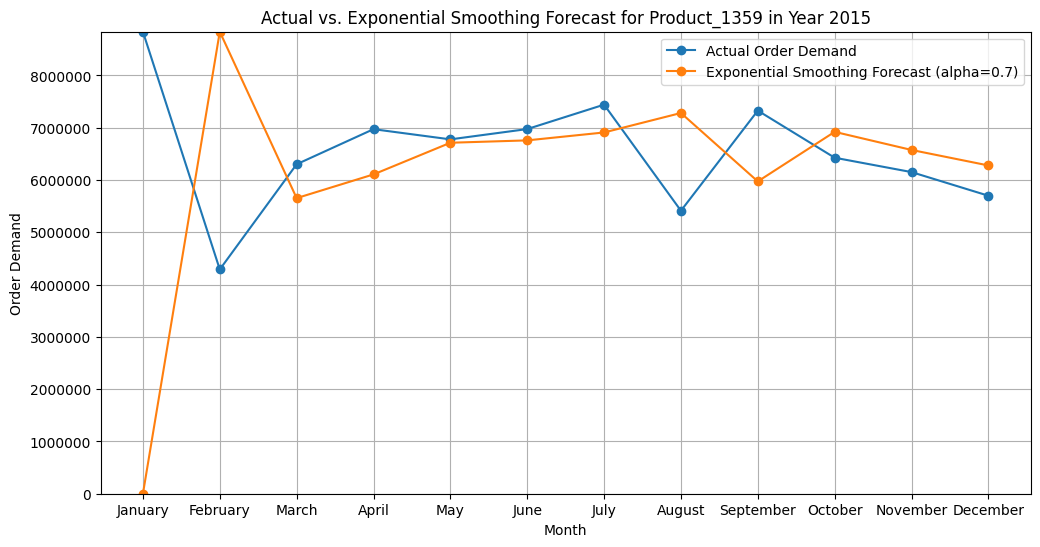

In [ ]:
#@title ##**`EXPONENTIAL SMOOTHING FORCASTE OF Product_1359 for year 2012`**
plot_exponential_smoothing_forecast("Product_1359",2012,0.7, grouped_product_dataframes)

##**`CONCLUSION`**
In this project, I analyzed the historical demand data of a product over the past 5 years and applied three different forecasting methods:

**Simple Moving Average (SMA)**

**Weighted Moving Average (WMA)**

**Exponential Smoothing (ES)**

####**`KEY OBSERVATION`**


*   The Simple Moving Average provided a smoothed forecast by averaging past data equally but reacted slowly to sudden changes in demand.
*   The Weighted Moving Average, by assigning more weight to recent observations, showed improved responsiveness compared to SMA, making it more suitable when recent trends are important

*   The Exponential Smoothing method, especially with a carefully chosen α, proved to be the most adaptive, as it placed higher weight on recent actual data points and better captured the recent fluctuations in demand.


***Among the three methods, Exponential Smoothing gave the most accurate and responsive forecast for this product’s volatile demand pattern.***


